# VEGETABLE OIL

- https://bashtage.github.io/linearmodels/iv/introduction.html
- https://bashtage.github.io/linearmodels/iv/examples/advanced-examples.html
- modelo: https://github.com/rachelsng/Train-Travel-Demand-Modelling-in-Python/blob/main/02_Demand_Modelling_with_2SLS.ipynb
- https://web.pdx.edu/~crkl/ceR/
- https://econml.azurewebsites.net/spec/estimation/deepiv.html


Cap 15 Wooldridge - pg 494

In [1]:
# !pip install linearmodels fredapi --quiet

In [2]:
import pandas as pd
import numpy as np
import linearmodels
import tabulate
import requests
import dateutil.parser

pd.set_option('display.max_columns', None)

# Leitura do Dataset

In [3]:
def get_main():
    df = pd.read_csv('https://raw.githubusercontent.com/fkfouri/vegetable_oil_mkt/master/dataset/COMM5__v4.csv', skiprows=1)
    print(df.shape)
    df['const'] = 1
    df.dropna(axis=1, how='all')
    print(df.shape)

    df['date'] = pd.to_datetime(df['date'])
    # df['date'] = pd.to_datetime(df['date'].dt.strftime('%Y-%m-%d'))
    df.set_index('date', inplace=True)
    
#     return df
    return  df[df.index < '2021-01-01']

df_main = get_main()
df_main.head()


(245, 116)
(245, 117)


,reference,A_exports,A_price,A_production,A_share_PROD,A_share_export,A_ΔP,A_ΔQ,A_Cuzada,A_Elasticidade,A_vol_prod,A_vol_exp,A_PnQo,A_balance,B_exports,B_price,B_production,B_share_PROD,B_share_export,B_ΔP,B_ΔQ,B_Cuzada,B_Elasticidade,B_vol_prod,B_vol_exp,B_PnQo,B_balance,C_exports,C_price,C_production,C_share_PROD,C_share_export,C_ΔP,C_ΔQ,C_Cuzada,C_Elasticidade,C_vol_prod,C_vol_exp,C_PnQo,C_balance,D_exports,D_price,D_production,D_share_PROD,D_share_export,D_ΔP,D_ΔQ,D_Cuzada,D_Elasticidade,D_vol_prod,D_vol_exp,D_PnQo,D_balance,E_exports,E_price,E_production,E_share_PROD,E_share_export,E_ΔP,E_ΔQ,E_Cuzada,E_Elasticidade,E_vol_prod,E_vol_exp,E_PnQo,E_balance,prod_total,exp_total,vol_prod_total,vol_expo_total,ΔP_total,ΔQ_total,elasticidade_total,ΣPnQo_total,price_total_exp,price_total_prod,FK IDX CALC PROD,FK IDX CALC EXP,Δ IDX/FAO,FK IDX 5 COMM,Δ IDX/FAO.1,FK IDX 7 COMM,Δ IDX/FAO.2,vegetable-oil_price,vegetable-oil_exports,EXPORT\nDIF USDA,EXPORT\nCALC/USDA,vegetable-oil_production,VOL PROD \nCALC/USDA,vegetable-oil_oecd_exports,EXPORT \nDIF OECD,EXPORT \nCALC/OECD,vegetable-oil_oecd_production,VOL PROD\nCALC/OECD,input_fertilizer_fred,input_mundi_ureia,input_mundi_dap,input_fertilizer_bloom,input_clude_oil,africa_eastern_and_southern_income,east_asia_and_pacific_income,europe_and_central_asia_income,high_income_income,latin_america_and_caribbean_income,least_developed_countries_un_classification_income,low_income_income,lower_middle_income_income,middle_east_and_north_africa_income,middle_income_income,north_america_income,oecd_members_income,south_asia_income,sub-saharan_africa_income,upper_middle_income_income,world_income,const
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-31,World,264.00,1224.868,699.42,4.07,3.7,0.132,-0.003,-0.302,0.024,856697.1766,323365.1520,324455.2845,37.7,4004.50,1016.374,6089.33,35.42,56.30,0.102,-0.001,0.699,0.007,6189036.689,4070069.683,3955036.474,65.8,531.92,1097.626,2427.75,14.12,7.50,0.046,0.007,0.0,0.144,2664761.522,583849.2219,368297.4280,21.9,1640.17,1026.196,6381.50,37.12,23.10,0.052,0.000,0.0,0.007,6548669.774,1683135.893,1578166.304,25.7,936.67,1170.020,1592.42,9.26,13.20,0.053,-0.016,0.0,0.307,1863163.248,1.095923e+06,731215.6992,58.8,17190.42,7113.26,18122328.41,7756342.584,0.072,0.079,1.097,6957171.190,1090.406169,1054.210916,128.238,135.707,0.977,130.114,0.992,129.912071,0.990,131.199,7689.17,575.91,0.925101,18658.00,0.921343,7301.11,187.85,0.974271,17908.53,0.959901,307.5,245.0,388.50,410.8200,48.73,90.78,719.03,1617.02,2997.18,465.82,78.12,47.99,158.83,466.45,337.13,4280.70,2604.18,135.62,100.54,572.53,730.62,1
2020-11-30,World,264.85,1073.480,700.35,4.08,3.6,0.285,-0.003,-0.007,0.011,751811.7180,284311.1780,284354.1172,37.8,4007.22,917.810,6088.80,35.43,54.21,0.113,-0.001,0.028,0.006,5588361.528,3677866.588,3571492.409,65.8,528.37,1047.780,2420.51,14.08,7.15,0.122,0.007,0.0,0.055,2536161.968,553615.5186,351572.1012,21.8,1639.60,973.880,6369.82,37.06,22.18,0.063,0.000,0.0,0.006,6203440.302,1596773.648,1497710.574,25.7,952.17,1109.112,1606.51,9.35,12.88,0.122,-0.016,0.0,0.132,1781799.519,1.056063e+06,693150.6355,59.3,17185.99,7392.21,16861575.03,7168630.106,0.103,0.108,1.042,6398279.838,969.754661,981.120000,119.347,120.691,0.979,119.662,0.982,119.158129,0.977,121.903,7704.28,312.07,0.959494,18655.97,0.921206,7289.46,-102.75,1.014096,17889.58,0.960670,292.1,245.0,359.63,384.9375,42.30,91.87,719.85,1623.89,3008.33,474.11,78.25,48.15,159.62,470.50,338.77,4296.22,2614.47,136.48,101.34,575.12,733.87,1
2020-10-31,World,265.71,805.910,701.28,4.08,3.6,0.048,-0.003,-0.041,0.066,565168.5648,214138.3461,213477.4999,37.9,4009.93,819.270,6088.26,35.43,54.14,0.029,-0.001,0.110,0.024,4987928.770,3285215.351,3188041.736,65.9,524.82,927.710,2413.26,14.05,7.09,-0.011,0.007,0.0,0.607,2238805.435,486880.7622,311283.8134,21.7,1639.03,914.770,6358.14,37.01,22.13,0.010,0.000,0.0,0.036,5816235.728,1499335.473,1406806.488,25

# Combinacoes

In [4]:
INCOMES = [col for col in df_main.columns if 'income' in col]
INPUTS = [col for col in df_main.columns if 'input' in col]
INCOMES

['africa_eastern_and_southern_income',
 'east_asia_and_pacific_income',
 'europe_and_central_asia_income',
 'high_income_income',
 'latin_america_and_caribbean_income',
 'least_developed_countries_un_classification_income',
 'low_income_income',
 'lower_middle_income_income',
 'middle_east_and_north_africa_income',
 'middle_income_income',
 'north_america_income',
 'oecd_members_income',
 'south_asia_income',
 'sub-saharan_africa_income',
 'upper_middle_income_income',
 'world_income']

In [5]:
import itertools 
from itertools import combinations, permutations

INCOMES_COMB = []
for j in range(2):
    temp = combinations(INCOMES, j+1)
    for i in list(temp):
        INCOMES_COMB.append(list(i))
        
INPUTS_COMB = []
for j in range(2): #len(INPUTS)):
    temp = combinations(INPUTS, j+1)
    for i in list(temp):
        INPUTS_COMB.append(list(i))
        
print( len(INPUTS_COMB), len(INCOMES_COMB) )

15 136


In [6]:
ALL_COMBI = []

for r in itertools.product(INPUTS_COMB, INCOMES_COMB):
    zipped = (r[0], r[1])
    ALL_COMBI.append(zipped)
    
print(len(ALL_COMBI))

2040


In [7]:
df = df_main[['const', 'exp_total', 'price_total_exp', 'input_mundi_dap', 'world_income']]
df

,const,exp_total,price_total_exp,input_mundi_dap,world_income
date,,,,,
2020-12-31,1,7113.26,1090.406169,388.50,730.62
2020-11-30,1,7392.21,969.754661,359.63,733.87
2020-10-31,1,7407.16,868.786850,357.10,737.12
2020-09-30,1,7422.11,854.031898,358.38,740.37
2020-08-31,1,7437.06,809.940713,341.88,743.62
...,...,...,...,...,...
2002-04-30,1,3151.41,377.847906,147.80,384.42
2002-03-31,1,3123.33,371.064871,149.75,383.43
2002-02-28,1,3095.25,371.687118,150.25,382.43


# Demanda em duas etapas OLS [sklearn + statsmodels]

P_HAT

In [8]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [9]:
# lr_modelo.score(X1, y1)

In [10]:
df = df_main[['const', 'exp_total', 'price_total_exp', 'input_mundi_dap', 'world_income']]

# EQ Reduzida
y1 = df['price_total_exp']
# X1 nao tem a variavel endogena exp_total, porem considera a variavel instrumental input_mundi_dap
X1 = df[['const', 'world_income', 'input_mundi_dap']]
lr_modelo = LinearRegression()
lr_modelo.fit(X=X1, y=y1)
z_hat = lr_modelo.predict(X1)
print('SCORE', lr_modelo.score(X1, y1))

# EQ Estrutural
y2 = df['exp_total']
X2 = df[['const', 'world_income']]
X2['price_hat'] = z_hat

print('DEMANDA')
ols_model = sm.OLS(y2,X2)
ols_results = ols_model.fit()
print(ols_results.summary())

SCORE 0.6660161251591713
DEMANDA
                            OLS Regression Results                            
Dep. Variable:              exp_total   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     513.8
Date:                Sun, 29 May 2022   Prob (F-statistic):           8.42e-85
Time:                        21:48:36   Log-Likelihood:                -1773.7
No. Observations:                 229   AIC:                             3553.
Df Residuals:                     226   BIC:                             3564.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -

C:\Users\fkfouri\AppData\Local\Temp\ipykernel_24020\858926162.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2['price_hat'] = z_hat


# Demanda por IV-2SLS [linearmodels]

In [11]:
# https://github.com/rachelsng/Train-Travel-Demand-Modelling-in-Python/blob/main/02_Demand_Modelling_with_2SLS.ipynb

# Heteroskedastic
df = df_main[['const', 'exp_total', 'price_total_exp', 'input_mundi_dap', 'world_income']]

dependent = df['exp_total']
exog = df.drop(['exp_total', 'price_total_exp', 'input_mundi_dap'], axis=1)
exog = sm.add_constant(exog)
endog = df[['price_total_exp']]
instruments = df[['input_mundi_dap']]
iv_mod = linearmodels.IV2SLS(dependent = dependent, exog=exog, endog=endog, instruments=instruments)
sm_2sls= iv_mod.fit( cov_type="robust")

print(sm_2sls)

                          IV-2SLS Estimation Summary                          
Dep. Variable:              exp_total   R-squared:                      0.8621
Estimator:                    IV-2SLS   Adj. R-squared:                 0.8609
No. Observations:                 229   F-statistic:                    3029.5
Date:                Sun, May 29 2022   P-value (F-stat)                0.0000
Time:                        21:48:36   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                                Parameter Estimates                                
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
const              -653.97     103.85    -6.2974     0.0000     -857.51     -450.43
world_income        13.027     0

In [12]:
sm_2sls.wu_hausman()

Wu-Hausman test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 5.5342
P-value: 0.0195
Distributed: F(1,225)
WaldTestStatistic, id: 0x2d00c012fb0

In [13]:
sm_2sls.durbin()

Durbin test of exogeneity
H0: All endogenous variables are exogenous
Statistic: 5.4974
P-value: 0.0190
Distributed: chi2(1)
WaldTestStatistic, id: 0x2d00c013280

In [14]:
sm_2sls.wooldridge_regression

Wooldridge's regression test of exogeneity
H0: Endogenous variables are exogenous
Statistic: 2.8740
P-value: 0.0900
Distributed: chi2(1)
WaldTestStatistic, id: 0x2d00f4b9330

# Demanda por formula [linearmodels]

- https://bashtage.github.io/linearmodels/iv/examples/using-formulas.html

In [15]:
df = df_main[['const', 'exp_total', 'price_total_exp', 'input_mundi_dap', 'world_income']].copy()

formula = 'exp_total ~ 1 + world_income + [price_total_exp ~ input_mundi_dap]'
results = linearmodels.IV2SLS.from_formula(formula, df).fit()
print(results.summary )


                          IV-2SLS Estimation Summary                          
Dep. Variable:              exp_total   R-squared:                      0.8621
Estimator:                    IV-2SLS   Adj. R-squared:                 0.8609
No. Observations:                 229   F-statistic:                    3029.5
Date:                Sun, May 29 2022   P-value (F-stat)                0.0000
Time:                        21:48:36   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                                Parameter Estimates                                
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
Intercept          -653.97     103.85    -6.2974     0.0000     -857.51     -450.43
world_income        13.027     0

# IV-2SLS [Statsmodels]
- https://www.statsmodels.org/dev/generated/statsmodels.sandbox.regression.gmm.IV2SLS.html

In [16]:
# from statsmodels.sandbox.regression.gmm import IV2SLS
from statsmodels.sandbox.regression import gmm

df = df_main[['const', 'exp_total', 'price_total_exp', 'input_mundi_dap', 'world_income']].copy()

endog = df[["exp_total"]]
exog = df[['const', "price_total_exp", 'world_income']]
instrument = df[['const', "world_income", 'input_mundi_dap']]
results = gmm.IV2SLS(endog=endog, exog=exog, instrument=instrument).fit()
print(results.summary())


                          IV2SLS Regression Results                           
Dep. Variable:              exp_total   R-squared:                       0.862
Model:                         IV2SLS   Adj. R-squared:                  0.861
Method:                     Two Stage   F-statistic:                     671.6
                        Least Squares   Prob (F-statistic):           7.99e-96
Date:                Sun, 29 May 2022                                         
Time:                        21:48:36                                         
No. Observations:                 229                                         
Df Residuals:                     226                                         
Df Model:                           2                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -653.9710    176.600     

In [17]:
results.spec_hausman()

(5.49736891553558, 0.06401201635062588, 2)

# GridSearch

In [18]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [19]:
df = df_main.copy()

In [20]:
# grid_search = RandomizedSearchCV(
#     estimator=linearmodels.IV2SLS, 
#     param_distributions=parametros_para_testar,
#     n_iter=30,
#     scoring= [ 'wu_hausman'], #funções para computar em cada teste.
# #     refit='f1', #MUITO CUIDADO: você quer escolher o melhor score da classe 1? ou a média das duas classes?
# #     cv = KFold(n_splits=5),
#     n_jobs=-1,
#     verbose=10
# )

In [21]:
# grid_search.fit(X2)

# 2SLS


https://bashtage.github.io/linearmodels/iv/examples/advanced-examples.html

In [22]:
from collections import OrderedDict

def compare_models(df, explicada, explicativa, endogena, VI, what = None):
    dados = df.copy()

    
    #OLS
    dependent = dados[explicada]
    exog = dados[explicativa + endogena]
    exog = sm.add_constant(exog)
    endog = None
    instrument = None
    res_ols  = linearmodels.IV2SLS(
        dependent = dependent, exog=exog, endog=endog, instruments=instrument
    ).fit()
   
    #2SLS
    dependent = dados[explicada]
    exog = dados[explicativa]
    exog = sm.add_constant(exog)
    endog = dados[endogena]
    instrument = dados[VI]
    ivmod = linearmodels.IV2SLS(
        dependent = dependent, exog=exog, endog=endog, instruments=instrument )
    
    res_2sls_std = ivmod.fit(cov_type="unadjusted")
    res_2sls_robust = ivmod.fit(cov_type="robust")

    #GMM
    res_gmm = linearmodels.IVGMM(
        dependent = dependent, exog=exog, endog=endog, instruments=instrument
    ).fit(cov_type="robust")
    
    
    #LIML
    res_liml = linearmodels.IVLIML(
        dependent = dependent, exog=exog, endog=endog, instruments=instrument
    ).fit(cov_type="robust")
    
    res = OrderedDict()
    res["OLS"] = res_ols
    res["2SLS-Homo"] = res_2sls_std
    res["2SLS-Hetero"] = res_2sls_robust
    res["GMM"] = res_gmm
#     res["LIML"] = "res_liml


    what = explicada if what is None else what
    results_as_html  = linearmodels.iv.compare(res).summary.as_html()
    
    df_summary = pd.read_html(results_as_html, header=0, index_col=0)[0]
#     columns = [(what, col) for col in x.columns]
#     df_summary.columns = pd.MultiIndex.from_tuples(columns)

    print(linearmodels.iv.compare(res))

    return res_2sls_robust



# x= compare_models(df, explicada= 'exp_total', explicativa= ['world_income'], endogena= ['price_total_exp'], VI=['input_mundi_dap'] )



In [23]:
def get_name(r):
    name = []
    for e in r:
        name.append("".join( [ s[0] for s in e.split('_') ]))

    return "-".join(name)


def run_model(df, explicada, endogena, exog, iv, name, res):
    dados = df.copy()
    dependent = dados[explicada]
    endog = dados[endogena]
    exog = dados[exog]
    exog = sm.add_constant(exog)

    instrument = dados[iv]

    ivmod = linearmodels.IV2SLS( dependent = dependent, exog=exog, endog=endog, instruments=instrument )
    res[name] = ivmod.fit( cov_type="robust")
    return res
        

def compare_instruments(df, explicada, endogena, what = None):
   
    i = 0
    stop = 3
    res_demand = OrderedDict()
    for r0, r1 in ALL_COMBI:
        name = f'{get_name(r0)}|{get_name(r1)}'
        print(name, r0, r1)
        res = run_model(df, explicada, endogena, r0, r1, name, res_demand)
        i+=1
#         if i > stop: break
        
    what = explicada if what is None else what
    results_as_html  = linearmodels.iv.compare(res_demand).summary.as_html()
    
    df_summary_demanda = pd.read_html(results_as_html, header=0, index_col=0)[0]
    
    #Oferta
    i = 0
    res_supply = OrderedDict()
    for r0, r1 in ALL_COMBI:
        name = f'{get_name(r0)}|{get_name(r1)}'
        res = run_model(df, explicada, endogena, r1, r0, name, res_supply)
        i+=1
#         if i > stop: break
        
    what = explicada if what is None else what
    results_as_html  = linearmodels.iv.compare(res_supply).summary.as_html()
    
    df_summary_supply = pd.read_html(results_as_html, header=0, index_col=0)[0]
    
#     columns = [(what, col) for col in x.columns]
#     df_summary.columns = pd.MultiIndex.from_tuples(columns)

#     print(linearmodels.iv.compare(res))

    return res_demand, res_supply, df_summary_demanda, df_summary_supply

In [24]:
oils = {}
oils['soybean'] = {}

In [25]:
DEPENDENTE = 'D_price'
INDEPENDENTE = 'D_exports'

df_temp = df_main.copy()
print('DEMANDA')

%time d, o, df_d, df_o = compare_instruments(df_temp, explicada= DEPENDENTE, endogena= [INDEPENDENTE], what='soybean' )


DEMANDA
iff|aeasi ['input_fertilizer_fred'] ['africa_eastern_and_southern_income']
iff|eaapi ['input_fertilizer_fred'] ['east_asia_and_pacific_income']
iff|eacai ['input_fertilizer_fred'] ['europe_and_central_asia_income']
iff|hii ['input_fertilizer_fred'] ['high_income_income']
iff|laaci ['input_fertilizer_fred'] ['latin_america_and_caribbean_income']
iff|ldcuci ['input_fertilizer_fred'] ['least_developed_countries_un_classification_income']
iff|lii ['input_fertilizer_fred'] ['low_income_income']
iff|lmii ['input_fertilizer_fred'] ['lower_middle_income_income']
iff|meanai ['input_fertilizer_fred'] ['middle_east_and_north_africa_income']
iff|mii ['input_fertilizer_fred'] ['middle_income_income']
iff|nai ['input_fertilizer_fred'] ['north_america_income']
iff|omi ['input_fertilizer_fred'] ['oecd_members_income']
iff|sai ['input_fertilizer_fred'] ['south_asia_income']
iff|sai ['input_fertilizer_fred'] ['sub-saharan_africa_income']
iff|umii ['input_fertilizer_fred'] ['upper_middle_income_i

iff|ldcuci-sai ['input_fertilizer_fred'] ['least_developed_countries_un_classification_income', 'sub-saharan_africa_income']
iff|ldcuci-umii ['input_fertilizer_fred'] ['least_developed_countries_un_classification_income', 'upper_middle_income_income']
iff|ldcuci-wi ['input_fertilizer_fred'] ['least_developed_countries_un_classification_income', 'world_income']
iff|lii-lmii ['input_fertilizer_fred'] ['low_income_income', 'lower_middle_income_income']
iff|lii-meanai ['input_fertilizer_fred'] ['low_income_income', 'middle_east_and_north_africa_income']
iff|lii-mii ['input_fertilizer_fred'] ['low_income_income', 'middle_income_income']
iff|lii-nai ['input_fertilizer_fred'] ['low_income_income', 'north_america_income']
iff|lii-omi ['input_fertilizer_fred'] ['low_income_income', 'oecd_members_income']
iff|lii-sai ['input_fertilizer_fred'] ['low_income_income', 'south_asia_income']
iff|lii-sai ['input_fertilizer_fred'] ['low_income_income', 'sub-saharan_africa_income']
iff|lii-umii ['input_fe

imu|eacai-ldcuci ['input_mundi_ureia'] ['europe_and_central_asia_income', 'least_developed_countries_un_classification_income']
imu|eacai-lii ['input_mundi_ureia'] ['europe_and_central_asia_income', 'low_income_income']
imu|eacai-lmii ['input_mundi_ureia'] ['europe_and_central_asia_income', 'lower_middle_income_income']
imu|eacai-meanai ['input_mundi_ureia'] ['europe_and_central_asia_income', 'middle_east_and_north_africa_income']
imu|eacai-mii ['input_mundi_ureia'] ['europe_and_central_asia_income', 'middle_income_income']
imu|eacai-nai ['input_mundi_ureia'] ['europe_and_central_asia_income', 'north_america_income']
imu|eacai-omi ['input_mundi_ureia'] ['europe_and_central_asia_income', 'oecd_members_income']
imu|eacai-sai ['input_mundi_ureia'] ['europe_and_central_asia_income', 'south_asia_income']
imu|eacai-sai ['input_mundi_ureia'] ['europe_and_central_asia_income', 'sub-saharan_africa_income']
imu|eacai-umii ['input_mundi_ureia'] ['europe_and_central_asia_income', 'upper_middle_inc

imu|sai-wi ['input_mundi_ureia'] ['sub-saharan_africa_income', 'world_income']
imu|umii-wi ['input_mundi_ureia'] ['upper_middle_income_income', 'world_income']
imd|aeasi ['input_mundi_dap'] ['africa_eastern_and_southern_income']
imd|eaapi ['input_mundi_dap'] ['east_asia_and_pacific_income']
imd|eacai ['input_mundi_dap'] ['europe_and_central_asia_income']
imd|hii ['input_mundi_dap'] ['high_income_income']
imd|laaci ['input_mundi_dap'] ['latin_america_and_caribbean_income']
imd|ldcuci ['input_mundi_dap'] ['least_developed_countries_un_classification_income']
imd|lii ['input_mundi_dap'] ['low_income_income']
imd|lmii ['input_mundi_dap'] ['lower_middle_income_income']
imd|meanai ['input_mundi_dap'] ['middle_east_and_north_africa_income']
imd|mii ['input_mundi_dap'] ['middle_income_income']
imd|nai ['input_mundi_dap'] ['north_america_income']
imd|omi ['input_mundi_dap'] ['oecd_members_income']
imd|sai ['input_mundi_dap'] ['south_asia_income']
imd|sai ['input_mundi_dap'] ['sub-saharan_africa

imd|lmii-nai ['input_mundi_dap'] ['lower_middle_income_income', 'north_america_income']
imd|lmii-omi ['input_mundi_dap'] ['lower_middle_income_income', 'oecd_members_income']
imd|lmii-sai ['input_mundi_dap'] ['lower_middle_income_income', 'south_asia_income']
imd|lmii-sai ['input_mundi_dap'] ['lower_middle_income_income', 'sub-saharan_africa_income']
imd|lmii-umii ['input_mundi_dap'] ['lower_middle_income_income', 'upper_middle_income_income']
imd|lmii-wi ['input_mundi_dap'] ['lower_middle_income_income', 'world_income']
imd|meanai-mii ['input_mundi_dap'] ['middle_east_and_north_africa_income', 'middle_income_income']
imd|meanai-nai ['input_mundi_dap'] ['middle_east_and_north_africa_income', 'north_america_income']
imd|meanai-omi ['input_mundi_dap'] ['middle_east_and_north_africa_income', 'oecd_members_income']
imd|meanai-sai ['input_mundi_dap'] ['middle_east_and_north_africa_income', 'south_asia_income']
imd|meanai-sai ['input_mundi_dap'] ['middle_east_and_north_africa_income', 'sub-s

ifb|eacai-umii ['input_fertilizer_bloom'] ['europe_and_central_asia_income', 'upper_middle_income_income']
ifb|eacai-wi ['input_fertilizer_bloom'] ['europe_and_central_asia_income', 'world_income']
ifb|hii-laaci ['input_fertilizer_bloom'] ['high_income_income', 'latin_america_and_caribbean_income']
ifb|hii-ldcuci ['input_fertilizer_bloom'] ['high_income_income', 'least_developed_countries_un_classification_income']
ifb|hii-lii ['input_fertilizer_bloom'] ['high_income_income', 'low_income_income']
ifb|hii-lmii ['input_fertilizer_bloom'] ['high_income_income', 'lower_middle_income_income']
ifb|hii-meanai ['input_fertilizer_bloom'] ['high_income_income', 'middle_east_and_north_africa_income']
ifb|hii-mii ['input_fertilizer_bloom'] ['high_income_income', 'middle_income_income']
ifb|hii-nai ['input_fertilizer_bloom'] ['high_income_income', 'north_america_income']
ifb|hii-omi ['input_fertilizer_bloom'] ['high_income_income', 'oecd_members_income']
ifb|hii-sai ['input_fertilizer_bloom'] ['hig

ico|nai ['input_clude_oil'] ['north_america_income']
ico|omi ['input_clude_oil'] ['oecd_members_income']
ico|sai ['input_clude_oil'] ['south_asia_income']
ico|sai ['input_clude_oil'] ['sub-saharan_africa_income']
ico|umii ['input_clude_oil'] ['upper_middle_income_income']
ico|wi ['input_clude_oil'] ['world_income']
ico|aeasi-eaapi ['input_clude_oil'] ['africa_eastern_and_southern_income', 'east_asia_and_pacific_income']
ico|aeasi-eacai ['input_clude_oil'] ['africa_eastern_and_southern_income', 'europe_and_central_asia_income']
ico|aeasi-hii ['input_clude_oil'] ['africa_eastern_and_southern_income', 'high_income_income']
ico|aeasi-laaci ['input_clude_oil'] ['africa_eastern_and_southern_income', 'latin_america_and_caribbean_income']
ico|aeasi-ldcuci ['input_clude_oil'] ['africa_eastern_and_southern_income', 'least_developed_countries_un_classification_income']
ico|aeasi-lii ['input_clude_oil'] ['africa_eastern_and_southern_income', 'low_income_income']
ico|aeasi-lmii ['input_clude_oil'] 

ico|lmii-meanai ['input_clude_oil'] ['lower_middle_income_income', 'middle_east_and_north_africa_income']
ico|lmii-mii ['input_clude_oil'] ['lower_middle_income_income', 'middle_income_income']
ico|lmii-nai ['input_clude_oil'] ['lower_middle_income_income', 'north_america_income']
ico|lmii-omi ['input_clude_oil'] ['lower_middle_income_income', 'oecd_members_income']
ico|lmii-sai ['input_clude_oil'] ['lower_middle_income_income', 'south_asia_income']
ico|lmii-sai ['input_clude_oil'] ['lower_middle_income_income', 'sub-saharan_africa_income']
ico|lmii-umii ['input_clude_oil'] ['lower_middle_income_income', 'upper_middle_income_income']
ico|lmii-wi ['input_clude_oil'] ['lower_middle_income_income', 'world_income']
ico|meanai-mii ['input_clude_oil'] ['middle_east_and_north_africa_income', 'middle_income_income']
ico|meanai-nai ['input_clude_oil'] ['middle_east_and_north_africa_income', 'north_america_income']
ico|meanai-omi ['input_clude_oil'] ['middle_east_and_north_africa_income', 'oecd_

iff-imu|eacai-sai ['input_fertilizer_fred', 'input_mundi_ureia'] ['europe_and_central_asia_income', 'south_asia_income']
iff-imu|eacai-sai ['input_fertilizer_fred', 'input_mundi_ureia'] ['europe_and_central_asia_income', 'sub-saharan_africa_income']
iff-imu|eacai-umii ['input_fertilizer_fred', 'input_mundi_ureia'] ['europe_and_central_asia_income', 'upper_middle_income_income']
iff-imu|eacai-wi ['input_fertilizer_fred', 'input_mundi_ureia'] ['europe_and_central_asia_income', 'world_income']
iff-imu|hii-laaci ['input_fertilizer_fred', 'input_mundi_ureia'] ['high_income_income', 'latin_america_and_caribbean_income']
iff-imu|hii-ldcuci ['input_fertilizer_fred', 'input_mundi_ureia'] ['high_income_income', 'least_developed_countries_un_classification_income']
iff-imu|hii-lii ['input_fertilizer_fred', 'input_mundi_ureia'] ['high_income_income', 'low_income_income']
iff-imu|hii-lmii ['input_fertilizer_fred', 'input_mundi_ureia'] ['high_income_income', 'lower_middle_income_income']
iff-imu|hii

iff-imu|umii-wi ['input_fertilizer_fred', 'input_mundi_ureia'] ['upper_middle_income_income', 'world_income']
iff-imd|aeasi ['input_fertilizer_fred', 'input_mundi_dap'] ['africa_eastern_and_southern_income']
iff-imd|eaapi ['input_fertilizer_fred', 'input_mundi_dap'] ['east_asia_and_pacific_income']
iff-imd|eacai ['input_fertilizer_fred', 'input_mundi_dap'] ['europe_and_central_asia_income']
iff-imd|hii ['input_fertilizer_fred', 'input_mundi_dap'] ['high_income_income']
iff-imd|laaci ['input_fertilizer_fred', 'input_mundi_dap'] ['latin_america_and_caribbean_income']
iff-imd|ldcuci ['input_fertilizer_fred', 'input_mundi_dap'] ['least_developed_countries_un_classification_income']
iff-imd|lii ['input_fertilizer_fred', 'input_mundi_dap'] ['low_income_income']
iff-imd|lmii ['input_fertilizer_fred', 'input_mundi_dap'] ['lower_middle_income_income']
iff-imd|meanai ['input_fertilizer_fred', 'input_mundi_dap'] ['middle_east_and_north_africa_income']
iff-imd|mii ['input_fertilizer_fred', 'input_

iff-imd|ldcuci-omi ['input_fertilizer_fred', 'input_mundi_dap'] ['least_developed_countries_un_classification_income', 'oecd_members_income']
iff-imd|ldcuci-sai ['input_fertilizer_fred', 'input_mundi_dap'] ['least_developed_countries_un_classification_income', 'south_asia_income']
iff-imd|ldcuci-sai ['input_fertilizer_fred', 'input_mundi_dap'] ['least_developed_countries_un_classification_income', 'sub-saharan_africa_income']
iff-imd|ldcuci-umii ['input_fertilizer_fred', 'input_mundi_dap'] ['least_developed_countries_un_classification_income', 'upper_middle_income_income']
iff-imd|ldcuci-wi ['input_fertilizer_fred', 'input_mundi_dap'] ['least_developed_countries_un_classification_income', 'world_income']
iff-imd|lii-lmii ['input_fertilizer_fred', 'input_mundi_dap'] ['low_income_income', 'lower_middle_income_income']
iff-imd|lii-meanai ['input_fertilizer_fred', 'input_mundi_dap'] ['low_income_income', 'middle_east_and_north_africa_income']
iff-imd|lii-mii ['input_fertilizer_fred', 'inpu

iff-ifb|eaapi-meanai ['input_fertilizer_fred', 'input_fertilizer_bloom'] ['east_asia_and_pacific_income', 'middle_east_and_north_africa_income']
iff-ifb|eaapi-mii ['input_fertilizer_fred', 'input_fertilizer_bloom'] ['east_asia_and_pacific_income', 'middle_income_income']
iff-ifb|eaapi-nai ['input_fertilizer_fred', 'input_fertilizer_bloom'] ['east_asia_and_pacific_income', 'north_america_income']
iff-ifb|eaapi-omi ['input_fertilizer_fred', 'input_fertilizer_bloom'] ['east_asia_and_pacific_income', 'oecd_members_income']
iff-ifb|eaapi-sai ['input_fertilizer_fred', 'input_fertilizer_bloom'] ['east_asia_and_pacific_income', 'south_asia_income']
iff-ifb|eaapi-sai ['input_fertilizer_fred', 'input_fertilizer_bloom'] ['east_asia_and_pacific_income', 'sub-saharan_africa_income']
iff-ifb|eaapi-umii ['input_fertilizer_fred', 'input_fertilizer_bloom'] ['east_asia_and_pacific_income', 'upper_middle_income_income']
iff-ifb|eaapi-wi ['input_fertilizer_fred', 'input_fertilizer_bloom'] ['east_asia_and_

iff-ifb|mii-umii ['input_fertilizer_fred', 'input_fertilizer_bloom'] ['middle_income_income', 'upper_middle_income_income']
iff-ifb|mii-wi ['input_fertilizer_fred', 'input_fertilizer_bloom'] ['middle_income_income', 'world_income']
iff-ifb|nai-omi ['input_fertilizer_fred', 'input_fertilizer_bloom'] ['north_america_income', 'oecd_members_income']
iff-ifb|nai-sai ['input_fertilizer_fred', 'input_fertilizer_bloom'] ['north_america_income', 'south_asia_income']
iff-ifb|nai-sai ['input_fertilizer_fred', 'input_fertilizer_bloom'] ['north_america_income', 'sub-saharan_africa_income']
iff-ifb|nai-umii ['input_fertilizer_fred', 'input_fertilizer_bloom'] ['north_america_income', 'upper_middle_income_income']
iff-ifb|nai-wi ['input_fertilizer_fred', 'input_fertilizer_bloom'] ['north_america_income', 'world_income']
iff-ifb|omi-sai ['input_fertilizer_fred', 'input_fertilizer_bloom'] ['oecd_members_income', 'south_asia_income']
iff-ifb|omi-sai ['input_fertilizer_fred', 'input_fertilizer_bloom'] ['o

iff-ico|laaci-omi ['input_fertilizer_fred', 'input_clude_oil'] ['latin_america_and_caribbean_income', 'oecd_members_income']
iff-ico|laaci-sai ['input_fertilizer_fred', 'input_clude_oil'] ['latin_america_and_caribbean_income', 'south_asia_income']
iff-ico|laaci-sai ['input_fertilizer_fred', 'input_clude_oil'] ['latin_america_and_caribbean_income', 'sub-saharan_africa_income']
iff-ico|laaci-umii ['input_fertilizer_fred', 'input_clude_oil'] ['latin_america_and_caribbean_income', 'upper_middle_income_income']
iff-ico|laaci-wi ['input_fertilizer_fred', 'input_clude_oil'] ['latin_america_and_caribbean_income', 'world_income']
iff-ico|ldcuci-lii ['input_fertilizer_fred', 'input_clude_oil'] ['least_developed_countries_un_classification_income', 'low_income_income']
iff-ico|ldcuci-lmii ['input_fertilizer_fred', 'input_clude_oil'] ['least_developed_countries_un_classification_income', 'lower_middle_income_income']
iff-ico|ldcuci-meanai ['input_fertilizer_fred', 'input_clude_oil'] ['least_develo

imu-imd|aeasi-umii ['input_mundi_ureia', 'input_mundi_dap'] ['africa_eastern_and_southern_income', 'upper_middle_income_income']
imu-imd|aeasi-wi ['input_mundi_ureia', 'input_mundi_dap'] ['africa_eastern_and_southern_income', 'world_income']
imu-imd|eaapi-eacai ['input_mundi_ureia', 'input_mundi_dap'] ['east_asia_and_pacific_income', 'europe_and_central_asia_income']
imu-imd|eaapi-hii ['input_mundi_ureia', 'input_mundi_dap'] ['east_asia_and_pacific_income', 'high_income_income']
imu-imd|eaapi-laaci ['input_mundi_ureia', 'input_mundi_dap'] ['east_asia_and_pacific_income', 'latin_america_and_caribbean_income']
imu-imd|eaapi-ldcuci ['input_mundi_ureia', 'input_mundi_dap'] ['east_asia_and_pacific_income', 'least_developed_countries_un_classification_income']
imu-imd|eaapi-lii ['input_mundi_ureia', 'input_mundi_dap'] ['east_asia_and_pacific_income', 'low_income_income']
imu-imd|eaapi-lmii ['input_mundi_ureia', 'input_mundi_dap'] ['east_asia_and_pacific_income', 'lower_middle_income_income']

imu-imd|mii-nai ['input_mundi_ureia', 'input_mundi_dap'] ['middle_income_income', 'north_america_income']
imu-imd|mii-omi ['input_mundi_ureia', 'input_mundi_dap'] ['middle_income_income', 'oecd_members_income']
imu-imd|mii-sai ['input_mundi_ureia', 'input_mundi_dap'] ['middle_income_income', 'south_asia_income']
imu-imd|mii-sai ['input_mundi_ureia', 'input_mundi_dap'] ['middle_income_income', 'sub-saharan_africa_income']
imu-imd|mii-umii ['input_mundi_ureia', 'input_mundi_dap'] ['middle_income_income', 'upper_middle_income_income']
imu-imd|mii-wi ['input_mundi_ureia', 'input_mundi_dap'] ['middle_income_income', 'world_income']
imu-imd|nai-omi ['input_mundi_ureia', 'input_mundi_dap'] ['north_america_income', 'oecd_members_income']
imu-imd|nai-sai ['input_mundi_ureia', 'input_mundi_dap'] ['north_america_income', 'south_asia_income']
imu-imd|nai-sai ['input_mundi_ureia', 'input_mundi_dap'] ['north_america_income', 'sub-saharan_africa_income']
imu-imd|nai-umii ['input_mundi_ureia', 'input_

imu-ifb|hii-umii ['input_mundi_ureia', 'input_fertilizer_bloom'] ['high_income_income', 'upper_middle_income_income']
imu-ifb|hii-wi ['input_mundi_ureia', 'input_fertilizer_bloom'] ['high_income_income', 'world_income']
imu-ifb|laaci-ldcuci ['input_mundi_ureia', 'input_fertilizer_bloom'] ['latin_america_and_caribbean_income', 'least_developed_countries_un_classification_income']
imu-ifb|laaci-lii ['input_mundi_ureia', 'input_fertilizer_bloom'] ['latin_america_and_caribbean_income', 'low_income_income']
imu-ifb|laaci-lmii ['input_mundi_ureia', 'input_fertilizer_bloom'] ['latin_america_and_caribbean_income', 'lower_middle_income_income']
imu-ifb|laaci-meanai ['input_mundi_ureia', 'input_fertilizer_bloom'] ['latin_america_and_caribbean_income', 'middle_east_and_north_africa_income']
imu-ifb|laaci-mii ['input_mundi_ureia', 'input_fertilizer_bloom'] ['latin_america_and_caribbean_income', 'middle_income_income']
imu-ifb|laaci-nai ['input_mundi_ureia', 'input_fertilizer_bloom'] ['latin_americ

imu-ico|aeasi-eacai ['input_mundi_ureia', 'input_clude_oil'] ['africa_eastern_and_southern_income', 'europe_and_central_asia_income']
imu-ico|aeasi-hii ['input_mundi_ureia', 'input_clude_oil'] ['africa_eastern_and_southern_income', 'high_income_income']
imu-ico|aeasi-laaci ['input_mundi_ureia', 'input_clude_oil'] ['africa_eastern_and_southern_income', 'latin_america_and_caribbean_income']
imu-ico|aeasi-ldcuci ['input_mundi_ureia', 'input_clude_oil'] ['africa_eastern_and_southern_income', 'least_developed_countries_un_classification_income']
imu-ico|aeasi-lii ['input_mundi_ureia', 'input_clude_oil'] ['africa_eastern_and_southern_income', 'low_income_income']
imu-ico|aeasi-lmii ['input_mundi_ureia', 'input_clude_oil'] ['africa_eastern_and_southern_income', 'lower_middle_income_income']
imu-ico|aeasi-meanai ['input_mundi_ureia', 'input_clude_oil'] ['africa_eastern_and_southern_income', 'middle_east_and_north_africa_income']
imu-ico|aeasi-mii ['input_mundi_ureia', 'input_clude_oil'] ['afri

imu-ico|lii-wi ['input_mundi_ureia', 'input_clude_oil'] ['low_income_income', 'world_income']
imu-ico|lmii-meanai ['input_mundi_ureia', 'input_clude_oil'] ['lower_middle_income_income', 'middle_east_and_north_africa_income']
imu-ico|lmii-mii ['input_mundi_ureia', 'input_clude_oil'] ['lower_middle_income_income', 'middle_income_income']
imu-ico|lmii-nai ['input_mundi_ureia', 'input_clude_oil'] ['lower_middle_income_income', 'north_america_income']
imu-ico|lmii-omi ['input_mundi_ureia', 'input_clude_oil'] ['lower_middle_income_income', 'oecd_members_income']
imu-ico|lmii-sai ['input_mundi_ureia', 'input_clude_oil'] ['lower_middle_income_income', 'south_asia_income']
imu-ico|lmii-sai ['input_mundi_ureia', 'input_clude_oil'] ['lower_middle_income_income', 'sub-saharan_africa_income']
imu-ico|lmii-umii ['input_mundi_ureia', 'input_clude_oil'] ['lower_middle_income_income', 'upper_middle_income_income']
imu-ico|lmii-wi ['input_mundi_ureia', 'input_clude_oil'] ['lower_middle_income_income', '

imd-ifb|eacai-lii ['input_mundi_dap', 'input_fertilizer_bloom'] ['europe_and_central_asia_income', 'low_income_income']
imd-ifb|eacai-lmii ['input_mundi_dap', 'input_fertilizer_bloom'] ['europe_and_central_asia_income', 'lower_middle_income_income']
imd-ifb|eacai-meanai ['input_mundi_dap', 'input_fertilizer_bloom'] ['europe_and_central_asia_income', 'middle_east_and_north_africa_income']
imd-ifb|eacai-mii ['input_mundi_dap', 'input_fertilizer_bloom'] ['europe_and_central_asia_income', 'middle_income_income']
imd-ifb|eacai-nai ['input_mundi_dap', 'input_fertilizer_bloom'] ['europe_and_central_asia_income', 'north_america_income']
imd-ifb|eacai-omi ['input_mundi_dap', 'input_fertilizer_bloom'] ['europe_and_central_asia_income', 'oecd_members_income']
imd-ifb|eacai-sai ['input_mundi_dap', 'input_fertilizer_bloom'] ['europe_and_central_asia_income', 'south_asia_income']
imd-ifb|eacai-sai ['input_mundi_dap', 'input_fertilizer_bloom'] ['europe_and_central_asia_income', 'sub-saharan_africa_in

imd-ifb|sai-umii ['input_mundi_dap', 'input_fertilizer_bloom'] ['south_asia_income', 'upper_middle_income_income']
imd-ifb|sai-wi ['input_mundi_dap', 'input_fertilizer_bloom'] ['south_asia_income', 'world_income']
imd-ifb|sai-umii ['input_mundi_dap', 'input_fertilizer_bloom'] ['sub-saharan_africa_income', 'upper_middle_income_income']
imd-ifb|sai-wi ['input_mundi_dap', 'input_fertilizer_bloom'] ['sub-saharan_africa_income', 'world_income']
imd-ifb|umii-wi ['input_mundi_dap', 'input_fertilizer_bloom'] ['upper_middle_income_income', 'world_income']
imd-ico|aeasi ['input_mundi_dap', 'input_clude_oil'] ['africa_eastern_and_southern_income']
imd-ico|eaapi ['input_mundi_dap', 'input_clude_oil'] ['east_asia_and_pacific_income']
imd-ico|eacai ['input_mundi_dap', 'input_clude_oil'] ['europe_and_central_asia_income']
imd-ico|hii ['input_mundi_dap', 'input_clude_oil'] ['high_income_income']
imd-ico|laaci ['input_mundi_dap', 'input_clude_oil'] ['latin_america_and_caribbean_income']
imd-ico|ldcuci 

imd-ico|laaci-omi ['input_mundi_dap', 'input_clude_oil'] ['latin_america_and_caribbean_income', 'oecd_members_income']
imd-ico|laaci-sai ['input_mundi_dap', 'input_clude_oil'] ['latin_america_and_caribbean_income', 'south_asia_income']
imd-ico|laaci-sai ['input_mundi_dap', 'input_clude_oil'] ['latin_america_and_caribbean_income', 'sub-saharan_africa_income']
imd-ico|laaci-umii ['input_mundi_dap', 'input_clude_oil'] ['latin_america_and_caribbean_income', 'upper_middle_income_income']
imd-ico|laaci-wi ['input_mundi_dap', 'input_clude_oil'] ['latin_america_and_caribbean_income', 'world_income']
imd-ico|ldcuci-lii ['input_mundi_dap', 'input_clude_oil'] ['least_developed_countries_un_classification_income', 'low_income_income']
imd-ico|ldcuci-lmii ['input_mundi_dap', 'input_clude_oil'] ['least_developed_countries_un_classification_income', 'lower_middle_income_income']
imd-ico|ldcuci-meanai ['input_mundi_dap', 'input_clude_oil'] ['least_developed_countries_un_classification_income', 'middle

ifb-ico|eaapi-lii ['input_fertilizer_bloom', 'input_clude_oil'] ['east_asia_and_pacific_income', 'low_income_income']
ifb-ico|eaapi-lmii ['input_fertilizer_bloom', 'input_clude_oil'] ['east_asia_and_pacific_income', 'lower_middle_income_income']
ifb-ico|eaapi-meanai ['input_fertilizer_bloom', 'input_clude_oil'] ['east_asia_and_pacific_income', 'middle_east_and_north_africa_income']
ifb-ico|eaapi-mii ['input_fertilizer_bloom', 'input_clude_oil'] ['east_asia_and_pacific_income', 'middle_income_income']
ifb-ico|eaapi-nai ['input_fertilizer_bloom', 'input_clude_oil'] ['east_asia_and_pacific_income', 'north_america_income']
ifb-ico|eaapi-omi ['input_fertilizer_bloom', 'input_clude_oil'] ['east_asia_and_pacific_income', 'oecd_members_income']
ifb-ico|eaapi-sai ['input_fertilizer_bloom', 'input_clude_oil'] ['east_asia_and_pacific_income', 'south_asia_income']
ifb-ico|eaapi-sai ['input_fertilizer_bloom', 'input_clude_oil'] ['east_asia_and_pacific_income', 'sub-saharan_africa_income']
ifb-ico|e

ifb-ico|nai-omi ['input_fertilizer_bloom', 'input_clude_oil'] ['north_america_income', 'oecd_members_income']
ifb-ico|nai-sai ['input_fertilizer_bloom', 'input_clude_oil'] ['north_america_income', 'south_asia_income']
ifb-ico|nai-sai ['input_fertilizer_bloom', 'input_clude_oil'] ['north_america_income', 'sub-saharan_africa_income']
ifb-ico|nai-umii ['input_fertilizer_bloom', 'input_clude_oil'] ['north_america_income', 'upper_middle_income_income']
ifb-ico|nai-wi ['input_fertilizer_bloom', 'input_clude_oil'] ['north_america_income', 'world_income']
ifb-ico|omi-sai ['input_fertilizer_bloom', 'input_clude_oil'] ['oecd_members_income', 'south_asia_income']
ifb-ico|omi-sai ['input_fertilizer_bloom', 'input_clude_oil'] ['oecd_members_income', 'sub-saharan_africa_income']
ifb-ico|omi-umii ['input_fertilizer_bloom', 'input_clude_oil'] ['oecd_members_income', 'upper_middle_income_income']
ifb-ico|omi-wi ['input_fertilizer_bloom', 'input_clude_oil'] ['oecd_members_income', 'world_income']
ifb-ic

KeyboardInterrupt: 

In [26]:
df_d.T.to_excel('soybean_demand.xlsx')

NameError: name 'df_d' is not defined

In [ ]:
df_o.T.to_excel('soybean_supply.xlsx')

# Quantidade em função do Preço

## GIRASSOL

In [27]:
df_main.head()

,reference,A_exports,A_price,A_production,A_share_PROD,A_share_export,A_ΔP,A_ΔQ,A_Cuzada,A_Elasticidade,A_vol_prod,A_vol_exp,A_PnQo,A_balance,B_exports,B_price,B_production,B_share_PROD,B_share_export,B_ΔP,B_ΔQ,B_Cuzada,B_Elasticidade,B_vol_prod,B_vol_exp,B_PnQo,B_balance,C_exports,C_price,C_production,C_share_PROD,C_share_export,C_ΔP,C_ΔQ,C_Cuzada,C_Elasticidade,C_vol_prod,C_vol_exp,C_PnQo,C_balance,D_exports,D_price,D_production,D_share_PROD,D_share_export,D_ΔP,D_ΔQ,D_Cuzada,D_Elasticidade,D_vol_prod,D_vol_exp,D_PnQo,D_balance,E_exports,E_price,E_production,E_share_PROD,E_share_export,E_ΔP,E_ΔQ,E_Cuzada,E_Elasticidade,E_vol_prod,E_vol_exp,E_PnQo,E_balance,prod_total,exp_total,vol_prod_total,vol_expo_total,ΔP_total,ΔQ_total,elasticidade_total,ΣPnQo_total,price_total_exp,price_total_prod,FK IDX CALC PROD,FK IDX CALC EXP,Δ IDX/FAO,FK IDX 5 COMM,Δ IDX/FAO.1,FK IDX 7 COMM,Δ IDX/FAO.2,vegetable-oil_price,vegetable-oil_exports,EXPORT\nDIF USDA,EXPORT\nCALC/USDA,vegetable-oil_production,VOL PROD \nCALC/USDA,vegetable-oil_oecd_exports,EXPORT \nDIF OECD,EXPORT \nCALC/OECD,vegetable-oil_oecd_production,VOL PROD\nCALC/OECD,input_fertilizer_fred,input_mundi_ureia,input_mundi_dap,input_fertilizer_bloom,input_clude_oil,africa_eastern_and_southern_income,east_asia_and_pacific_income,europe_and_central_asia_income,high_income_income,latin_america_and_caribbean_income,least_developed_countries_un_classification_income,low_income_income,lower_middle_income_income,middle_east_and_north_africa_income,middle_income_income,north_america_income,oecd_members_income,south_asia_income,sub-saharan_africa_income,upper_middle_income_income,world_income,const
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-31,World,264.00,1224.868,699.42,4.07,3.7,0.132,-0.003,-0.302,0.024,856697.1766,323365.1520,324455.2845,37.7,4004.50,1016.374,6089.33,35.42,56.30,0.102,-0.001,0.699,0.007,6189036.689,4070069.683,3955036.474,65.8,531.92,1097.626,2427.75,14.12,7.50,0.046,0.007,0.0,0.144,2664761.522,583849.2219,368297.4280,21.9,1640.17,1026.196,6381.50,37.12,23.10,0.052,0.000,0.0,0.007,6548669.774,1683135.893,1578166.304,25.7,936.67,1170.020,1592.42,9.26,13.20,0.053,-0.016,0.0,0.307,1863163.248,1.095923e+06,731215.6992,58.8,17190.42,7113.26,18122328.41,7756342.584,0.072,0.079,1.097,6957171.190,1090.406169,1054.210916,128.238,135.707,0.977,130.114,0.992,129.912071,0.990,131.199,7689.17,575.91,0.925101,18658.00,0.921343,7301.11,187.85,0.974271,17908.53,0.959901,307.5,245.0,388.50,410.8200,48.73,90.78,719.03,1617.02,2997.18,465.82,78.12,47.99,158.83,466.45,337.13,4280.70,2604.18,135.62,100.54,572.53,730.62,1
2020-11-30,World,264.85,1073.480,700.35,4.08,3.6,0.285,-0.003,-0.007,0.011,751811.7180,284311.1780,284354.1172,37.8,4007.22,917.810,6088.80,35.43,54.21,0.113,-0.001,0.028,0.006,5588361.528,3677866.588,3571492.409,65.8,528.37,1047.780,2420.51,14.08,7.15,0.122,0.007,0.0,0.055,2536161.968,553615.5186,351572.1012,21.8,1639.60,973.880,6369.82,37.06,22.18,0.063,0.000,0.0,0.006,6203440.302,1596773.648,1497710.574,25.7,952.17,1109.112,1606.51,9.35,12.88,0.122,-0.016,0.0,0.132,1781799.519,1.056063e+06,693150.6355,59.3,17185.99,7392.21,16861575.03,7168630.106,0.103,0.108,1.042,6398279.838,969.754661,981.120000,119.347,120.691,0.979,119.662,0.982,119.158129,0.977,121.903,7704.28,312.07,0.959494,18655.97,0.921206,7289.46,-102.75,1.014096,17889.58,0.960670,292.1,245.0,359.63,384.9375,42.30,91.87,719.85,1623.89,3008.33,474.11,78.25,48.15,159.62,470.50,338.77,4296.22,2614.47,136.48,101.34,575.12,733.87,1
2020-10-31,World,265.71,805.910,701.28,4.08,3.6,0.048,-0.003,-0.041,0.066,565168.5648,214138.3461,213477.4999,37.9,4009.93,819.270,6088.26,35.43,54.14,0.029,-0.001,0.110,0.024,4987928.770,3285215.351,3188041.736,65.9,524.82,927.710,2413.26,14.05,7.09,-0.011,0.007,0.0,0.607,2238805.435,486880.7622,311283.8134,21.7,1639.03,914.770,6358.14,37.01,22.13,0.010,0.000,0.0,0.036,5816235.728,1499335.473,1406806.488,25

In [28]:
df_gir = df_main[['E_exports', 'E_price', 'input_mundi_dap', 'world_income']].copy()
print('DEMANDA')
d = compare_models(df_gir, explicada='E_exports', explicativa=['world_income'], endogena=['E_price'], VI=['input_mundi_dap'] )
print('-~=' * 40)
print('OFERTA')
o = compare_models(df_gir, explicada='E_exports', explicativa=['input_mundi_dap'], endogena=['E_price'], VI=['world_income'] )

DEMANDA
                                    Model Comparison                                    
                               OLS         2SLS-Homo       2SLS-Hetero               GMM
----------------------------------------------------------------------------------------
Dep. Variable            E_exports         E_exports         E_exports         E_exports
Estimator                      OLS           IV-2SLS           IV-2SLS            IV-GMM
No. Observations               229               229               229               229
Cov. Est.                   robust        unadjusted            robust            robust
R-squared                   0.7493            0.7424            0.7424            0.7424
Adj. R-squared              0.7471            0.7401            0.7401            0.7401
F-statistic                 972.48            605.03            1026.8            1026.8
P-value (F-stat)            0.0000            0.0000            0.0000            0.0000
=============

In [29]:
df_gir['q_d'] = d.params['const'] + \
                d.params['E_price']*df_gir['E_price'] + \
                d.params['world_income']*df_gir['world_income']

df_gir['q_o'] = o.params['const'] + \
                o.params['E_price']*df_gir['E_price'] + \
                o.params['input_mundi_dap']*df_gir['input_mundi_dap']
df_gir

,E_exports,E_price,input_mundi_dap,world_income,q_d,q_o
date,,,,,,
2020-12-31,936.67,1170.020,388.50,730.62,591.129697,1869.027665
2020-11-30,952.17,1109.112,359.63,733.87,631.661809,1752.205184
2020-10-31,967.67,981.402,357.10,737.12,708.111820,911.278648
2020-09-30,983.17,982.385,358.38,740.37,715.366564,904.799706
2020-08-31,998.67,877.140,341.88,743.62,779.737661,359.909220
...,...,...,...,...,...,...
2002-04-30,171.53,552.000,147.80,384.42,94.325838,146.925735
2002-03-31,168.85,557.000,149.75,383.43,89.266546,160.830899
2002-02-28,166.18,578.000,150.25,382.43,75.580473,298.245823


## Soybean

In [30]:
EXP = 'D_exports'
PRIC = 'D_price'

df_soy = df_main[[EXP, 'D_price', 'input_mundi_dap', 'world_income']]
print('DEMANDA')
d = compare_models(df_soy, explicada= EXP, explicativa= ['world_income'], endogena= [PRIC], VI=['input_mundi_dap'] )
print('-~=' * 40)
print('OFERTA')
o = compare_models(df_soy, explicada= EXP, explicativa= ['input_mundi_dap'], endogena= [PRIC], VI=['world_income'] )

DEMANDA
                                    Model Comparison                                    
                               OLS         2SLS-Homo       2SLS-Hetero               GMM
----------------------------------------------------------------------------------------
Dep. Variable            D_exports         D_exports         D_exports         D_exports
Estimator                      OLS           IV-2SLS           IV-2SLS            IV-GMM
No. Observations               229               229               229               229
Cov. Est.                   robust        unadjusted            robust            robust
R-squared                   0.2817            0.2658            0.2658            0.2658
Adj. R-squared              0.2754            0.2593            0.2593            0.2593
F-statistic                 68.842            31.170            28.565            28.565
P-value (F-stat)          1.11e-15         1.704e-07         6.267e-07         6.267e-07
=============

In [31]:
d

IV-2SLS Estimation Summary                          
==============================================================================
Dep. Variable:              D_exports   R-squared:                      0.2658
Estimator:                    IV-2SLS   Adj. R-squared:                 0.2593
No. Observations:                 229   F-statistic:                    28.565
Date:                Sun, May 29 2022   P-value (F-stat)                0.0000
Time:                        21:49:21   Distribution:                  chi2(2)
Cov. Estimator:                robust                                         
                                                                              
                              Parameter Estimates                               
================================================================================
              Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
--------------------------------------------------------------------------------
const            1265.1     38.994     32.443     0.0000      1188.7      1341.5
world_income     0.5694     0.1066     5.3438     0.0000      0.3606      0.7783
D_price         -0.2801     0.0640    -4.3737     0.0000     -0.4057     -0.1546
================================================================================

Endogenous: D_price
Instruments: input_mundi_dap
Robust Covariance (Heteroskedastic)
Debiased: False
IVResults, id: 0x2d04b17b4c0

In [32]:
df_soy['q_d'] = d.params['const'] + d.params['D_price']*df_soy['D_price'] + d.params['world_income']*df_soy['world_income']
df_soy['q_d1'] = d.predict()
df_soy['q_o']= o.predict()
df_soy

C:\Users\fkfouri\AppData\Local\Temp\ipykernel_24020\1157028108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soy['q_d'] = d.params['const'] + d.params['D_price']*df_soy['D_price'] + d.params['world_income']*df_soy['world_income']
C:\Users\fkfouri\AppData\Local\Temp\ipykernel_24020\1157028108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soy['q_d1'] = d.predict()
C:\Users\fkfouri\AppData\Local\Temp\ipykernel_24020\1157028108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a co

,D_exports,D_price,input_mundi_dap,world_income,q_d,q_d1,q_o
date,,,,,,,
2020-12-31,1640.17,1026.196,388.50,730.62,1393.647006,1393.647006,1483.192528
2020-11-30,1639.60,973.880,359.63,733.87,1410.152854,1410.152854,1477.001856
2020-10-31,1639.03,914.770,357.10,737.12,1428.561902,1428.561902,1444.513460
2020-09-30,1638.46,905.860,358.38,740.37,1432.908450,1432.908450,1438.208664
2020-08-31,1637.89,866.940,341.88,743.62,1445.661684,1445.661684,1429.385811
...,...,...,...,...,...,...,...
2002-04-30,1206.11,370.860,147.80,384.42,1380.094951,1380.094951,1303.175995
2002-03-31,1196.17,359.210,149.75,383.43,1382.794740,1382.794740,1294.698186
2002-02-28,1186.22,364.920,150.25,382.43,1380.625787,1380.625787,1297.619985


## Canola

In [33]:
EXP = 'C_exports'
PRIC = 'C_price'

df_temp = df_main[[EXP, PRIC, 'input_mundi_dap', 'world_income']]
print('DEMANDA')
d = compare_models(df_temp, explicada= EXP, explicativa= ['world_income'], endogena= [PRIC], VI=['input_mundi_dap'] )
print('-~=' * 40)
print('OFERTA')
o = compare_models(df_temp, explicada= EXP, explicativa= ['input_mundi_dap'], endogena= [PRIC], VI=['world_income'] )



DEMANDA
                                    Model Comparison                                    
                               OLS         2SLS-Homo       2SLS-Hetero               GMM
----------------------------------------------------------------------------------------
Dep. Variable            C_exports         C_exports         C_exports         C_exports
Estimator                      OLS           IV-2SLS           IV-2SLS            IV-GMM
No. Observations               229               229               229               229
Cov. Est.                   robust        unadjusted            robust            robust
R-squared                   0.8332            0.8222            0.8222            0.8222
Adj. R-squared              0.8318            0.8206            0.8206            0.8206
F-statistic                 1722.5            1061.3            1782.1            1782.1
P-value (F-stat)            0.0000            0.0000            0.0000            0.0000
=============

In [34]:
df_temp['q_d'] = d.predict()
df_temp['q_o'] = o.predict()
df_temp

C:\Users\fkfouri\AppData\Local\Temp\ipykernel_24020\2995182159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['q_d'] = d.predict()
C:\Users\fkfouri\AppData\Local\Temp\ipykernel_24020\2995182159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['q_o'] = o.predict()


,C_exports,C_price,input_mundi_dap,world_income,q_d,q_o
date,,,,,,
2020-12-31,531.92,1097.626,388.50,730.62,315.734802,594.744218
2020-11-30,528.37,1047.780,359.63,733.87,334.079769,560.589457
2020-10-31,524.82,927.710,357.10,737.12,372.445972,339.690233
2020-09-30,521.27,938.140,358.38,740.37,373.605930,356.685606
2020-08-31,517.72,921.550,341.88,743.62,382.469433,359.573911
...,...,...,...,...,...,...
2002-04-30,82.75,410.770,147.80,384.42,71.236669,-200.913479
2002-03-31,83.60,415.850,149.75,383.43,68.529174,-195.379993
2002-02-28,84.46,423.450,150.25,382.43,65.090495,-182.100922


## PALM

In [35]:
EXP = 'B_exports'
PRIC = 'B_price'

df_temp = df_main[[EXP, PRIC, 'input_mundi_dap', 'world_income']]
print('DEMANDA')
d = compare_models(df_temp, explicada= EXP, explicativa= ['world_income'], endogena= [PRIC], VI=['input_mundi_dap'] )
print('-~=' * 40)
print('OFERTA')
o = compare_models(df_temp, explicada= EXP, explicativa= ['input_mundi_dap'], endogena= [PRIC], VI=['world_income'] )



DEMANDA
                                    Model Comparison                                    
                               OLS         2SLS-Homo       2SLS-Hetero               GMM
----------------------------------------------------------------------------------------
Dep. Variable            B_exports         B_exports         B_exports         B_exports
Estimator                      OLS           IV-2SLS           IV-2SLS            IV-GMM
No. Observations               229               229               229               229
Cov. Est.                   robust        unadjusted            robust            robust
R-squared                   0.9022            0.8974            0.8974            0.8974
Adj. R-squared              0.9013            0.8965            0.8965            0.8965
F-statistic                 4301.3            1951.3            3810.7            3810.7
P-value (F-stat)            0.0000            0.0000            0.0000            0.0000
=============

In [36]:
df_temp['q_d'] = d.predict()
df_temp['q_o'] = o.predict()
df_temp

C:\Users\fkfouri\AppData\Local\Temp\ipykernel_24020\2995182159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['q_d'] = d.predict()
C:\Users\fkfouri\AppData\Local\Temp\ipykernel_24020\2995182159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['q_o'] = o.predict()


,B_exports,B_price,input_mundi_dap,world_income,q_d,q_o
date,,,,,,
2020-12-31,4004.50,1016.374,388.50,730.62,3342.116889,6008.006875
2020-11-30,4007.22,917.810,359.63,733.87,3518.285845,5203.865010
2020-10-31,4009.93,819.270,357.10,737.12,3694.418299,4133.235734
2020-09-30,4012.65,796.220,358.38,740.37,3755.737928,3863.842885
2020-08-31,4015.36,760.300,341.88,743.62,3836.631554,3631.336364
...,...,...,...,...,...,...
2002-04-30,1559.83,360.070,147.80,384.42,1542.689909,1144.318266
2002-03-31,1543.88,359.000,149.75,383.43,1536.317203,1112.666248
2002-02-28,1527.92,352.980,150.25,382.43,1537.392148,1040.630441


## PALM KERNEL

In [37]:
EXP = 'A_exports'
PRIC = 'A_price'

df_temp = df_main[[EXP, PRIC, 'input_mundi_dap', 'world_income']]
print('DEMANDA')
d = compare_models(df_temp, explicada= EXP, explicativa= ['world_income'], endogena= [PRIC], VI=['input_mundi_dap'] )
print('-~=' * 40)
print('OFERTA')
o = compare_models(df_temp, explicada= EXP, explicativa= ['input_mundi_dap'], endogena= [PRIC], VI=['world_income'] )



DEMANDA
                                    Model Comparison                                    
                               OLS         2SLS-Homo       2SLS-Hetero               GMM
----------------------------------------------------------------------------------------
Dep. Variable            A_exports         A_exports         A_exports         A_exports
Estimator                      OLS           IV-2SLS           IV-2SLS            IV-GMM
No. Observations               229               229               229               229
Cov. Est.                   robust        unadjusted            robust            robust
R-squared                   0.9486            0.9420            0.9420            0.9420
Adj. R-squared              0.9482            0.9415            0.9415            0.9415
F-statistic                 6569.1            3715.4            5048.7            5048.7
P-value (F-stat)            0.0000            0.0000            0.0000            0.0000
=============

In [38]:
df_temp['q_d'] = d.predict()
df_temp['q_o'] = o.predict()
df_temp

C:\Users\fkfouri\AppData\Local\Temp\ipykernel_24020\2995182159.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['q_d'] = d.predict()
C:\Users\fkfouri\AppData\Local\Temp\ipykernel_24020\2995182159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['q_o'] = o.predict()


,A_exports,A_price,input_mundi_dap,world_income,q_d,q_o
date,,,,,,
2020-12-31,264.00,1224.868,388.50,730.62,251.341121,311.476481
2020-11-30,264.85,1073.480,359.63,733.87,257.039475,275.069189
2020-10-31,265.71,805.910,357.10,737.12,266.106482,200.640526
2020-09-30,266.56,767.840,358.38,740.37,268.519224,189.709881
2020-08-31,267.42,739.170,341.88,743.62,270.659418,185.108346
...,...,...,...,...,...,...
2002-04-30,131.19,405.000,147.80,384.42,135.682928,131.839987
2002-03-31,130.83,353.240,149.75,383.43,136.784972,116.935081
2002-02-28,130.47,356.000,150.25,382.43,136.302203,117.604308


## PROXY

In [39]:
EXP = 'exp_total'
PRIC = 'price_total_exp'

df_temp = df_main[[EXP, PRIC, 'input_mundi_dap', 'world_income']]
print('DEMANDA')
d = compare_models(df_temp, explicada= EXP, explicativa= ['world_income'], endogena= [PRIC], VI=['input_mundi_dap'] )
print('-~=' * 40)
print('OFERTA')
o = compare_models(df_temp, explicada= EXP, explicativa= ['input_mundi_dap'], endogena= [PRIC], VI=['world_income'] )



DEMANDA
                                    Model Comparison                                    
                               OLS         2SLS-Homo       2SLS-Hetero               GMM
----------------------------------------------------------------------------------------
Dep. Variable            exp_total         exp_total         exp_total         exp_total
Estimator                      OLS           IV-2SLS           IV-2SLS            IV-GMM
No. Observations               229               229               229               229
Cov. Est.                   robust        unadjusted            robust            robust
R-squared                   0.8664            0.8621            0.8621            0.8621
Adj. R-squared              0.8652            0.8609            0.8609            0.8609
F-statistic                 3139.4            1361.0            3029.5            3029.5
P-value (F-stat)            0.0000            0.0000            0.0000            0.0000
=============

In [40]:
df_temp['q_d'] = d.predict()
df_temp['q_o'] = o.predict()
df_temp['q_m'] = (df_temp['q_d'] + df_temp['q_o'])/2
df_temp

C:\Users\fkfouri\AppData\Local\Temp\ipykernel_24020\4227588548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['q_d'] = d.predict()
C:\Users\fkfouri\AppData\Local\Temp\ipykernel_24020\4227588548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['q_o'] = o.predict()
C:\Users\fkfouri\AppData\Local\Temp\ipykernel_24020\4227588548.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,exp_total,price_total_exp,input_mundi_dap,world_income,q_d,q_o,q_m
date,,,,,,,
2020-12-31,7113.26,1090.406169,388.50,730.62,5741.092891,10222.468602,7981.780746
2020-11-30,7392.21,969.754661,359.63,733.87,6128.937020,8651.968832,7390.452926
2020-10-31,7407.16,868.786850,357.10,737.12,6460.413383,6951.752305,6706.082844
2020-09-30,7422.11,854.031898,358.38,740.37,6545.003893,6673.855426,6609.429660
2020-08-31,7437.06,809.940713,341.88,743.62,6713.603922,6206.085947,6459.844934
...,...,...,...,...,...,...,...
2002-04-30,3151.41,377.847906,147.80,384.42,3271.754302,2199.703199,2735.728750
2002-03-31,3123.33,371.064871,149.75,383.43,3278.282203,2047.656606,2662.969404
2002-02-28,3095.25,371.687118,150.25,382.43,3263.473496,2049.491620,2656.482558


In [41]:
df_temp['q_m'] = (df_temp['q_d'] + df_temp['q_o'])/2
df_temp

C:\Users\fkfouri\AppData\Local\Temp\ipykernel_24020\1833797238.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['q_m'] = (df_temp['q_d'] + df_temp['q_o'])/2


,exp_total,price_total_exp,input_mundi_dap,world_income,q_d,q_o,q_m
date,,,,,,,
2020-12-31,7113.26,1090.406169,388.50,730.62,5741.092891,10222.468602,7981.780746
2020-11-30,7392.21,969.754661,359.63,733.87,6128.937020,8651.968832,7390.452926
2020-10-31,7407.16,868.786850,357.10,737.12,6460.413383,6951.752305,6706.082844
2020-09-30,7422.11,854.031898,358.38,740.37,6545.003893,6673.855426,6609.429660
2020-08-31,7437.06,809.940713,341.88,743.62,6713.603922,6206.085947,6459.844934
...,...,...,...,...,...,...,...
2002-04-30,3151.41,377.847906,147.80,384.42,3271.754302,2199.703199,2735.728750
2002-03-31,3123.33,371.064871,149.75,383.43,3278.282203,2047.656606,2662.969404
2002-02-28,3095.25,371.687118,150.25,382.43,3263.473496,2049.491620,2656.482558


#  Preço em função da Quantidade

In [42]:
df_main.head()

,reference,A_exports,A_price,A_production,A_share_PROD,A_share_export,A_ΔP,A_ΔQ,A_Cuzada,A_Elasticidade,A_vol_prod,A_vol_exp,A_PnQo,A_balance,B_exports,B_price,B_production,B_share_PROD,B_share_export,B_ΔP,B_ΔQ,B_Cuzada,B_Elasticidade,B_vol_prod,B_vol_exp,B_PnQo,B_balance,C_exports,C_price,C_production,C_share_PROD,C_share_export,C_ΔP,C_ΔQ,C_Cuzada,C_Elasticidade,C_vol_prod,C_vol_exp,C_PnQo,C_balance,D_exports,D_price,D_production,D_share_PROD,D_share_export,D_ΔP,D_ΔQ,D_Cuzada,D_Elasticidade,D_vol_prod,D_vol_exp,D_PnQo,D_balance,E_exports,E_price,E_production,E_share_PROD,E_share_export,E_ΔP,E_ΔQ,E_Cuzada,E_Elasticidade,E_vol_prod,E_vol_exp,E_PnQo,E_balance,prod_total,exp_total,vol_prod_total,vol_expo_total,ΔP_total,ΔQ_total,elasticidade_total,ΣPnQo_total,price_total_exp,price_total_prod,FK IDX CALC PROD,FK IDX CALC EXP,Δ IDX/FAO,FK IDX 5 COMM,Δ IDX/FAO.1,FK IDX 7 COMM,Δ IDX/FAO.2,vegetable-oil_price,vegetable-oil_exports,EXPORT\nDIF USDA,EXPORT\nCALC/USDA,vegetable-oil_production,VOL PROD \nCALC/USDA,vegetable-oil_oecd_exports,EXPORT \nDIF OECD,EXPORT \nCALC/OECD,vegetable-oil_oecd_production,VOL PROD\nCALC/OECD,input_fertilizer_fred,input_mundi_ureia,input_mundi_dap,input_fertilizer_bloom,input_clude_oil,africa_eastern_and_southern_income,east_asia_and_pacific_income,europe_and_central_asia_income,high_income_income,latin_america_and_caribbean_income,least_developed_countries_un_classification_income,low_income_income,lower_middle_income_income,middle_east_and_north_africa_income,middle_income_income,north_america_income,oecd_members_income,south_asia_income,sub-saharan_africa_income,upper_middle_income_income,world_income,const
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-31,World,264.00,1224.868,699.42,4.07,3.7,0.132,-0.003,-0.302,0.024,856697.1766,323365.1520,324455.2845,37.7,4004.50,1016.374,6089.33,35.42,56.30,0.102,-0.001,0.699,0.007,6189036.689,4070069.683,3955036.474,65.8,531.92,1097.626,2427.75,14.12,7.50,0.046,0.007,0.0,0.144,2664761.522,583849.2219,368297.4280,21.9,1640.17,1026.196,6381.50,37.12,23.10,0.052,0.000,0.0,0.007,6548669.774,1683135.893,1578166.304,25.7,936.67,1170.020,1592.42,9.26,13.20,0.053,-0.016,0.0,0.307,1863163.248,1.095923e+06,731215.6992,58.8,17190.42,7113.26,18122328.41,7756342.584,0.072,0.079,1.097,6957171.190,1090.406169,1054.210916,128.238,135.707,0.977,130.114,0.992,129.912071,0.990,131.199,7689.17,575.91,0.925101,18658.00,0.921343,7301.11,187.85,0.974271,17908.53,0.959901,307.5,245.0,388.50,410.8200,48.73,90.78,719.03,1617.02,2997.18,465.82,78.12,47.99,158.83,466.45,337.13,4280.70,2604.18,135.62,100.54,572.53,730.62,1
2020-11-30,World,264.85,1073.480,700.35,4.08,3.6,0.285,-0.003,-0.007,0.011,751811.7180,284311.1780,284354.1172,37.8,4007.22,917.810,6088.80,35.43,54.21,0.113,-0.001,0.028,0.006,5588361.528,3677866.588,3571492.409,65.8,528.37,1047.780,2420.51,14.08,7.15,0.122,0.007,0.0,0.055,2536161.968,553615.5186,351572.1012,21.8,1639.60,973.880,6369.82,37.06,22.18,0.063,0.000,0.0,0.006,6203440.302,1596773.648,1497710.574,25.7,952.17,1109.112,1606.51,9.35,12.88,0.122,-0.016,0.0,0.132,1781799.519,1.056063e+06,693150.6355,59.3,17185.99,7392.21,16861575.03,7168630.106,0.103,0.108,1.042,6398279.838,969.754661,981.120000,119.347,120.691,0.979,119.662,0.982,119.158129,0.977,121.903,7704.28,312.07,0.959494,18655.97,0.921206,7289.46,-102.75,1.014096,17889.58,0.960670,292.1,245.0,359.63,384.9375,42.30,91.87,719.85,1623.89,3008.33,474.11,78.25,48.15,159.62,470.50,338.77,4296.22,2614.47,136.48,101.34,575.12,733.87,1
2020-10-31,World,265.71,805.910,701.28,4.08,3.6,0.048,-0.003,-0.041,0.066,565168.5648,214138.3461,213477.4999,37.9,4009.93,819.270,6088.26,35.43,54.14,0.029,-0.001,0.110,0.024,4987928.770,3285215.351,3188041.736,65.9,524.82,927.710,2413.26,14.05,7.09,-0.011,0.007,0.0,0.607,2238805.435,486880.7622,311283.8134,21.7,1639.03,914.770,6358.14,37.01,22.13,0.010,0.000,0.0,0.036,5816235.728,1499335.473,1406806.488,25

## Soybean

In [43]:
DEPENDENTE = 'D_price'
INDEPENDENTE = 'D_exports'

df_temp = df_main[[DEPENDENTE, INDEPENDENTE, 'input_mundi_dap', 'world_income']].copy()
df_temp = df_main.copy()
print('DEMANDA')
d = compare_models(df_temp, 
                   explicada= DEPENDENTE, 
                   explicativa= ['world_income'],
                   endogena= [INDEPENDENTE], 
                   VI=['input_mundi_dap', 'input_clude_oil'] )
print('-~=' * 40)
print('OFERTA')
o = compare_models(df_temp, explicada= DEPENDENTE, 
                   explicativa= ['input_mundi_dap', 'input_clude_oil'], 
                   endogena= [INDEPENDENTE], 
                   VI=['world_income'] )

DEMANDA
                                    Model Comparison                                    
                               OLS         2SLS-Homo       2SLS-Hetero               GMM
----------------------------------------------------------------------------------------
Dep. Variable              D_price           D_price           D_price           D_price
Estimator                      OLS           IV-2SLS           IV-2SLS            IV-GMM
No. Observations               229               229               229               229
Cov. Est.                   robust        unadjusted            robust            robust
R-squared                   0.5910           -0.0595           -0.0595            0.1770
Adj. R-squared              0.5874           -0.0688           -0.0688            0.1697
F-statistic                 643.81            162.23            164.03            229.82
P-value (F-stat)            0.0000            0.0000            0.0000            0.0000
=============

In [44]:
d.params

const           2750.384860
world_income       1.781518
D_exports         -2.191187
Name: parameter, dtype: float64

In [45]:
df_temp['p_d'] = d.predict()
df_temp['p_d2'] = d.params['const'] + d.params[INDEPENDENTE]*df_temp[INDEPENDENTE] + d.params['world_income']*df_temp['world_income']

df_temp['p_o'] = o.predict()
df_temp['p_m'] = (df_temp['p_d'] + df_temp['p_o'])/2
df_temp.head()

,reference,A_exports,A_price,A_production,A_share_PROD,A_share_export,A_ΔP,A_ΔQ,A_Cuzada,A_Elasticidade,A_vol_prod,A_vol_exp,A_PnQo,A_balance,B_exports,B_price,B_production,B_share_PROD,B_share_export,B_ΔP,B_ΔQ,B_Cuzada,B_Elasticidade,B_vol_prod,B_vol_exp,B_PnQo,B_balance,C_exports,C_price,C_production,C_share_PROD,C_share_export,C_ΔP,C_ΔQ,C_Cuzada,C_Elasticidade,C_vol_prod,C_vol_exp,C_PnQo,C_balance,D_exports,D_price,D_production,D_share_PROD,D_share_export,D_ΔP,D_ΔQ,D_Cuzada,D_Elasticidade,D_vol_prod,D_vol_exp,D_PnQo,D_balance,E_exports,E_price,E_production,E_share_PROD,E_share_export,E_ΔP,E_ΔQ,E_Cuzada,E_Elasticidade,E_vol_prod,E_vol_exp,E_PnQo,E_balance,prod_total,exp_total,vol_prod_total,vol_expo_total,ΔP_total,ΔQ_total,elasticidade_total,ΣPnQo_total,price_total_exp,price_total_prod,FK IDX CALC PROD,FK IDX CALC EXP,Δ IDX/FAO,FK IDX 5 COMM,Δ IDX/FAO.1,FK IDX 7 COMM,Δ IDX/FAO.2,vegetable-oil_price,vegetable-oil_exports,EXPORT\nDIF USDA,EXPORT\nCALC/USDA,vegetable-oil_production,VOL PROD \nCALC/USDA,vegetable-oil_oecd_exports,EXPORT \nDIF OECD,EXPORT \nCALC/OECD,vegetable-oil_oecd_production,VOL PROD\nCALC/OECD,input_fertilizer_fred,input_mundi_ureia,input_mundi_dap,input_fertilizer_bloom,input_clude_oil,africa_eastern_and_southern_income,east_asia_and_pacific_income,europe_and_central_asia_income,high_income_income,latin_america_and_caribbean_income,least_developed_countries_un_classification_income,low_income_income,lower_middle_income_income,middle_east_and_north_africa_income,middle_income_income,north_america_income,oecd_members_income,south_asia_income,sub-saharan_africa_income,upper_middle_income_income,world_income,const,p_d,p_d2,p_o,p_m
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-31,World,264.00,1224.868,699.42,4.07,3.7,0.132,-0.003,-0.302,0.024,856697.1766,323365.1520,324455.2845,37.7,4004.50,1016.374,6089.33,35.42,56.30,0.102,-0.001,0.699,0.007,6189036.689,4070069.683,3955036.474,65.8,531.92,1097.626,2427.75,14.12,7.50,0.046,0.007,0.0,0.144,2664761.522,583849.2219,368297.4280,21.9,1640.17,1026.196,6381.50,37.12,23.10,0.052,0.000,0.0,0.007,6548669.774,1683135.893,1578166.304,25.7,936.67,1170.020,1592.42,9.26,13.20,0.053,-0.016,0.0,0.307,1863163.248,1.095923e+06,731215.6992,58.8,17190.42,7113.26,18122328.41,7756342.584,0.072,0.079,1.097,6957171.190,1090.406169,1054.210916,128.238,135.707,0.977,130.114,0.992,129.912071,0.990,131.199,7689.17,575.91,0.925101,18658.00,0.921343,7301.11,187.85,0.974271,17908.53,0.959901,307.5,245.0,388.50,410.8200,48.73,90.78,719.03,1617.02,2997.18,465.82,78.12,47.99,158.83,466.45,337.13,4280.70,2604.18,135.62,100.54,572.53,730.62,1,458.078877,458.078877,927.185851,692.632364
2020-11-30,World,264.85,1073.480,700.35,4.08,3.6,0.285,-0.003,-0.007,0.011,751811.7180,284311.1780,284354.1172,37.8,4007.22,917.810,6088.80,35.43,54.21,0.113,-0.001,0.028,0.006,5588361.528,3677866.588,3571492.409,65.8,528.37,1047.780,2420.51,14.08,7.15,0.122,0.007,0.0,0.055,2536161.968,553615.5186,351572.1012,21.8,1639.60,973.880,6369.82,37.06,22.18,0.063,0.000,0.0,0.006,6203440.302,1596773.648,1497710.574,25.7,952.17,1109.112,1606.51,9.35,12.88,0.122,-0.016,0.0,0.132,1781799.519,1.056063e+06,693150.6355,59.3,17185.99,7392.21,16861575.03,7168630.106,0.103,0.108,1.042,6398279.838,969.754661,981.120000,119.347,120.691,0.979,119.662,0.982,119.158129,0.977,121.903,7704.28,312.07,0.959494,18655.97,0.921206,7289.46,-102.75,1.014096,17889.58,0.960670,292.1,245.0,359.63,384.9375,42.30,91.87,719.85,1623.89,3008.33,474.11,78.25,48.15,159.62,470.50,338.77,4296.22,2614.47,136.48,101.34,575.12,733.87,1,465.117789,465.117789,869.530091,667.323940
2020-10-31,World,265.71,805.910,701.28,4.08,3.6,0.048,-0.003,-0.041,0.066,565168.5648,214138.3461,213477.4999,37.9,4009.93,819.270,6088.26,35.43,54.14,0.029,-0.001,0.110,0.024,4987928.770,3285215.351,3188041.736,65.9,524.82,927.710,2413.26,14.05,7.09,-0.011,0.007,0.0,0.607,2238805.435,486880.7622,3112

## Palm - RUIM

In [46]:
DEPENDENTE = 'B_price'
INDEPENDENTE = 'B_exports'


DEMAND_VAR = 'upper_middle_income_income'
# DEMAND_VAR = 'north_america_income'
DEMAND_VAR = ['least_developed_countries_un_classification_income', 'upper_middle_income_income', 'middle_income_income']

SUPPLY_VAR = 'input_mundi_dap'
# SUPPLY_VAR = 'bloomberg_price_index'
SUPPLY_VAR = ['input_mundi_dap', 'input_clude_oil']
# 

df_temp = df_main.copy()

print('DEMANDA')
d = compare_models(df_temp, 
                   explicada= DEPENDENTE, 
                   explicativa= ['world_income'], 
                   endogena= [INDEPENDENTE], 
                   VI=SUPPLY_VAR )
print('-~=' * 40)
print('OFERTA')
o = compare_models(df_temp, 
                   explicada= DEPENDENTE, 
                   explicativa= SUPPLY_VAR, 
                   endogena= [INDEPENDENTE], 
                   VI=DEMAND_VAR )




DEMANDA
                                    Model Comparison                                    
                               OLS         2SLS-Homo       2SLS-Hetero               GMM
----------------------------------------------------------------------------------------
Dep. Variable              B_price           B_price           B_price           B_price
Estimator                      OLS           IV-2SLS           IV-2SLS            IV-GMM
No. Observations               229               229               229               229
Cov. Est.                   robust        unadjusted            robust            robust
R-squared                   0.6531            0.5324            0.5324            0.5536
Adj. R-squared              0.6500            0.5282            0.5282            0.5497
F-statistic                 649.92            348.80            587.30            725.98
P-value (F-stat)            0.0000            0.0000            0.0000            0.0000
=============

In [47]:
df_temp['p_d'] = d.predict()
df_temp['p_o'] = o.predict()
df_temp['p_m'] = (df_temp['p_d'] + df_temp['p_o'])/2
df_temp

,reference,A_exports,A_price,A_production,A_share_PROD,A_share_export,A_ΔP,A_ΔQ,A_Cuzada,A_Elasticidade,A_vol_prod,A_vol_exp,A_PnQo,A_balance,B_exports,B_price,B_production,B_share_PROD,B_share_export,B_ΔP,B_ΔQ,B_Cuzada,B_Elasticidade,B_vol_prod,B_vol_exp,B_PnQo,B_balance,C_exports,C_price,C_production,C_share_PROD,C_share_export,C_ΔP,C_ΔQ,C_Cuzada,C_Elasticidade,C_vol_prod,C_vol_exp,C_PnQo,C_balance,D_exports,D_price,D_production,D_share_PROD,D_share_export,D_ΔP,D_ΔQ,D_Cuzada,D_Elasticidade,D_vol_prod,D_vol_exp,D_PnQo,D_balance,E_exports,E_price,E_production,E_share_PROD,E_share_export,E_ΔP,E_ΔQ,E_Cuzada,E_Elasticidade,E_vol_prod,E_vol_exp,E_PnQo,E_balance,prod_total,exp_total,vol_prod_total,vol_expo_total,ΔP_total,ΔQ_total,elasticidade_total,ΣPnQo_total,price_total_exp,price_total_prod,FK IDX CALC PROD,FK IDX CALC EXP,Δ IDX/FAO,FK IDX 5 COMM,Δ IDX/FAO.1,FK IDX 7 COMM,Δ IDX/FAO.2,vegetable-oil_price,vegetable-oil_exports,EXPORT\nDIF USDA,EXPORT\nCALC/USDA,vegetable-oil_production,VOL PROD \nCALC/USDA,vegetable-oil_oecd_exports,EXPORT \nDIF OECD,EXPORT \nCALC/OECD,vegetable-oil_oecd_production,VOL PROD\nCALC/OECD,input_fertilizer_fred,input_mundi_ureia,input_mundi_dap,input_fertilizer_bloom,input_clude_oil,africa_eastern_and_southern_income,east_asia_and_pacific_income,europe_and_central_asia_income,high_income_income,latin_america_and_caribbean_income,least_developed_countries_un_classification_income,low_income_income,lower_middle_income_income,middle_east_and_north_africa_income,middle_income_income,north_america_income,oecd_members_income,south_asia_income,sub-saharan_africa_income,upper_middle_income_income,world_income,const,p_d,p_o,p_m
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-12-31,World,264.00,1224.868,699.42,4.07,3.7,0.132,-0.003,-0.302,0.024,856697.1766,323365.1520,324455.2845,37.7,4004.50,1016.374,6089.33,35.42,56.30,0.102,-0.001,0.699,0.007,6.189037e+06,4.070070e+06,3955036.474,65.8,531.92,1097.626,2427.75,14.12,7.50,0.046,0.007,0.0,0.144,2.664762e+06,583849.2219,368297.4280,21.9,1640.17,1026.196,6381.50,37.12,23.10,0.052,0.000,0.0,0.007,6548669.774,1.683136e+06,1.578166e+06,25.7,936.67,1170.020,1592.42,9.26,13.20,0.053,-0.016,0.0,0.307,1863163.248,1.095923e+06,731215.6992,58.8,17190.42,7113.26,1.812233e+07,7756342.584,0.072,0.079,1.097,6957171.190,1090.406169,1054.210916,128.238,135.707,0.977,130.114,0.992,129.912071,0.990,131.199,7689.17,575.91,0.925101,18658.00,0.921343,7301.11,187.85,0.974271,17908.53,0.959901,307.5,245.00,388.50,410.820000,48.73,90.78,719.03,1617.02,2997.18,465.82,78.12,47.99,158.83,466.45,337.13,4280.70,2604.18,135.62,100.54,572.53,730.62,1,608.208363,701.070241,654.639302
2020-11-30,World,264.85,1073.480,700.35,4.08,3.6,0.285,-0.003,-0.007,0.011,751811.7180,284311.1780,284354.1172,37.8,4007.22,917.810,6088.80,35.43,54.21,0.113,-0.001,0.028,0.006,5.588362e+06,3.677867e+06,3571492.409,65.8,528.37,1047.780,2420.51,14.08,7.15,0.122,0.007,0.0,0.055,2.536162e+06,553615.5186,351572.1012,21.8,1639.60,973.880,6369.82,37.06,22.18,0.063,0.000,0.0,0.006,6203440.302,1.596774e+06,1.497711e+06,25.7,952.17,1109.112,1606.51,9.35,12.88,0.122,-0.016,0.0,0.132,1781799.519,1.056063e+06,693150.6355,59.3,17185.99,7392.21,1.686158e+07,7168630.106,0.103,0.108,1.042,6398279.838,969.754661,981.120000,119.347,120.691,0.979,119.662,0.982,119.158129,0.977,121.903,7704.28,312.07,0.959494,18655.97,0.921206,7289.46,-102.75,1.014096,17889.58,0.960670,292.1,245.00,359.63,384.937500,42.30,91.87,719.85,1623.89,3008.33,474.11,78.25,48.15,159.62,470.50,338.77,4296.22,2614.47,136.48,101.34,575.12,733.87,1,622.433024,658.483833,640.458428
2020-10-31,World,265.71,805.910,701.28,4.08,3.6,0.048,-0.003,-0.041,0.066,565168.5648,214138.3461,213477.4999,37.9,4009.93,819.270,6088.26,35.43,54.14,0.029,-0.001,0.110,0.024,4.987929e+06,3.285215e+06,3188041.736,65.9,524.82,927.710,2413.26,14.05,7.09,-0.011,0.007,0.0,0.607,2.238805e+06,486880.7622,311283.8134

In [48]:
 df_temp.iloc[0]

reference            World
A_exports            264.0
A_price           1224.868
A_production        699.42
A_share_PROD          4.07
                   ...    
world_income        730.62
const                    1
p_d             608.208363
p_o             701.070241
p_m             654.639302
Name: 2020-12-31 00:00:00, Length: 119, dtype: object

In [49]:
qty = 4004.50
qty2 = 3000
qty3 = 5000
income = df_temp.iloc[0][2]
fertilizer = 307.50
print("OFERTA PRECOS\n ", o.predict(exog = np.array([[1, 245, 388.5, 48.73 ], [1, 245, 388.5, 48.73]]), endog= np.array([[qty], [qty2]])))
print("DEMANDA PRECOS\n", d.predict(exog = np.array([[1, 78.12, 572.53, 337.13], [1, 78.12, 572.53, 337.13]]), endog= np.array([[qty], [qty2]])))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 5)

In [50]:
d.params

const          -602.631520
world_income      4.866920
B_exports        -0.585598
Name: parameter, dtype: float64

## Canola

In [51]:
DEPENDENTE = 'C_price'
INDEPENDENTE = 'C_exports'
DEMAND_VAR = 'world_income'
DEMAND_VAR = 'middle_income_income'
DEMAND_VAR = 'high_income_income'

SUPPLY_VAR = 'input_mundi_dap'
# SUPPLY_VAR = 'bloomberg_price_index'


df_temp = df_main[[DEPENDENTE, INDEPENDENTE, DEMAND_VAR, SUPPLY_VAR]].copy()
print('DEMANDA')
d = compare_models(df_temp, 
                   explicada= DEPENDENTE, 
                   explicativa= [DEMAND_VAR], 
                   endogena= [INDEPENDENTE], 
                   VI=[SUPPLY_VAR] )
print('-~=' * 40)
print('OFERTA')
o = compare_models(df_temp, 
                   explicada= DEPENDENTE, 
                   explicativa= [SUPPLY_VAR], 
                   endogena= [INDEPENDENTE], 
                   VI=[DEMAND_VAR] )


DEMANDA
                                     Model Comparison                                     
                                 OLS         2SLS-Homo       2SLS-Hetero               GMM
------------------------------------------------------------------------------------------
Dep. Variable                C_price           C_price           C_price           C_price
Estimator                        OLS           IV-2SLS           IV-2SLS            IV-GMM
No. Observations                 229               229               229               229
Cov. Est.                     robust        unadjusted            robust            robust
R-squared                     0.4736           -0.0367           -0.0367           -0.0367
Adj. R-squared                0.4690           -0.0458           -0.0458           -0.0458
F-statistic                   436.68            151.51            199.56            199.56
P-value (F-stat)              0.0000            0.0000            0.0000          

In [52]:
df_temp['p_d'] = d.predict()
df_temp['p_o'] = o.predict()
df_temp['p_m'] = (df_temp['p_d'] + df_temp['p_o'])/2
df_temp

,C_price,C_exports,high_income_income,input_mundi_dap,p_d,p_o,p_m
date,,,,,,,
2020-12-31,1097.626,531.92,2997.18,388.50,253.698812,1030.053757,641.876285
2020-11-30,1047.780,528.37,3008.33,359.63,291.213188,996.256510,643.734849
2020-10-31,927.710,524.82,3019.47,357.10,328.709277,992.009657,660.359467
2020-09-30,938.140,521.27,3030.61,358.38,366.205365,992.037179,679.121272
2020-08-31,921.550,517.72,3041.75,341.88,403.701454,972.117623,687.909539
...,...,...,...,...,...,...,...
2002-04-30,410.770,82.75,1780.77,147.80,196.007480,581.805050,388.906265
2002-03-31,415.850,83.60,1775.89,149.75,182.983279,584.329966,383.656622
2002-02-28,423.450,84.46,1771.02,150.25,169.929126,585.232118,377.580622


# Formas Reduzidas


In [53]:
# α β π ω
def get_parms(d, o):
    α0 = d.params[0]
    α1 = d.params[2]
    α2 = d.params[1]
    
    β0 = o.params[0]
    β1 = o.params[2]
    β2 = o.params[1]
    return α0, α1, α2, β0, β1, β2
    
    
    
def π0(d, o):
    α0, α1, α2, β0, β1, β2 = get_parms(d, o)
    return (α1*β0 + α0*β1) / (α1 - β1)

def π1(d, o):
    α0, α1, α2, β0, β1, β2 = get_parms(d, o)
    return (- α2*β1) / (α1 - β1)

def π2(d, o):
    α0, α1, α2, β0, β1, β2 = get_parms(d, o)
    return (α1*β2) / (α1 - β1)

# def ω1(d, o):
#     α0, α1, α2, β0, β1, β2 = get_parms(d, o)
#     return (α1*β0 + α0*β1) / (α1 - β1)


def π3(d, o):
    α0, α1, α2, β0, β1, β2 = get_parms(d, o)
    return (β0 - α0) / (α1 - β1)

def π4(d, o):
    α0, α1, α2, β0, β1, β2 = get_parms(d, o)
    return (- α2) / (α1 - β1)

def π5(d, o):
    α0, α1, α2, β0, β1, β2 = get_parms(d, o)
    return (β2) / (α1 - β1)

In [54]:
def two_sls(df, explicada, endogena, explicativas, VI):
    dependent = df[explicada]
    endog = df[endogena]
    
    exog = df[explicativas]
    exog = sm.add_constant(exog)

    instruments = df[VI]
    return linearmodels.IV2SLS(dependent=dependent, exog=exog, endog=endog, instruments=instruments).fit(cov_type="robust")



def reducted(dados, explicada, endogena, explicativas, VI):
    df = dados.copy()
    
    demand = two_sls(df, explicada, endogena, explicativas, VI)
    _var = f'{explicada}_demand'
    df[_var] = demand.predict()
    
    supply = two_sls(df, explicada, endogena, VI, explicativas)
    _var = f'{explicada}_supply'
    df[_var] = supply.predict()
    
    
    Q = [π0(demand, supply), π1(demand, supply), π2(demand, supply)]
    P = [π3(demand, supply), π4(demand, supply), π5(demand, supply)]
    
    return df, demand, supply, P, Q

## Proxy

In [55]:
EXP = 'exp_total'
PRIC = 'price_total_exp'

df_temp = df_main[[EXP, PRIC, 'input_mundi_dap', 'world_income']]
df_temp, d, o, P, Q = reducted(df_temp, explicada= EXP, endogena= PRIC, explicativas= ['world_income'], VI=['input_mundi_dap'] )

print(P, Q)

[51.651333839576225, 0.6464921805186541, 0.8854917107481097] [320.17574432381883, 11.175448146947176, -2.5357630015201496]


In [56]:
df_temp

,exp_total,price_total_exp,input_mundi_dap,world_income,exp_total_demand,exp_total_supply
date,,,,,,
2020-12-31,7113.26,1090.406169,388.50,730.62,5741.092891,10222.468602
2020-11-30,7392.21,969.754661,359.63,733.87,6128.937020,8651.968832
2020-10-31,7407.16,868.786850,357.10,737.12,6460.413383,6951.752305
2020-09-30,7422.11,854.031898,358.38,740.37,6545.003893,6673.855426
2020-08-31,7437.06,809.940713,341.88,743.62,6713.603922,6206.085947
...,...,...,...,...,...,...
2002-04-30,3151.41,377.847906,147.80,384.42,3271.754302,2199.703199
2002-03-31,3123.33,371.064871,149.75,383.43,3278.282203,2047.656606
2002-02-28,3095.25,371.687118,150.25,382.43,3263.473496,2049.491620


## Soybean


In [57]:
EXP = 'D_exports'
PRIC = 'D_price'

df_temp = df_main[[EXP, PRIC, 'input_mundi_dap', 'world_income']]
df_temp, d, o, P, Q = reducted(df_temp, explicada= EXP, endogena= PRIC, explicativas= ['world_income'], VI=['input_mundi_dap'] )

print(P, Q)
df_temp

[62.31979354738984, 0.6575061794593828, 0.9783530310857801] [-464.1162227304298, 0.38522674032676246, -0.27406553067139683]


,D_exports,D_price,input_mundi_dap,world_income,D_exports_demand,D_exports_supply
date,,,,,,
2020-12-31,1640.17,1026.196,388.50,730.62,1393.647006,1483.192528
2020-11-30,1639.60,973.880,359.63,733.87,1410.152854,1477.001856
2020-10-31,1639.03,914.770,357.10,737.12,1428.561902,1444.513460
2020-09-30,1638.46,905.860,358.38,740.37,1432.908450,1438.208664
2020-08-31,1637.89,866.940,341.88,743.62,1445.661684,1429.385811
...,...,...,...,...,...,...
2002-04-30,1206.11,370.860,147.80,384.42,1380.094951,1303.175995
2002-03-31,1196.17,359.210,149.75,383.43,1382.794740,1294.698186
2002-02-28,1186.22,364.920,150.25,382.43,1380.625787,1297.619985


# Rodney

In [58]:
EXP = 'D_exports'
PRIC = 'D_price'

df_temp = df_main[[EXP, PRIC, 'input_mundi_dap', 'world_income']]
df_temp, d, o, P, Q = reducted(df_temp, explicada= EXP, endogena= PRIC, explicativas= ['world_income'], VI=['input_mundi_dap'] )

print(P, Q)
df_temp

[62.31979354738984, 0.6575061794593828, 0.9783530310857801] [-464.1162227304298, 0.38522674032676246, -0.27406553067139683]


,D_exports,D_price,input_mundi_dap,world_income,D_exports_demand,D_exports_supply
date,,,,,,
2020-12-31,1640.17,1026.196,388.50,730.62,1393.647006,1483.192528
2020-11-30,1639.60,973.880,359.63,733.87,1410.152854,1477.001856
2020-10-31,1639.03,914.770,357.10,737.12,1428.561902,1444.513460
2020-09-30,1638.46,905.860,358.38,740.37,1432.908450,1438.208664
2020-08-31,1637.89,866.940,341.88,743.62,1445.661684,1429.385811
...,...,...,...,...,...,...
2002-04-30,1206.11,370.860,147.80,384.42,1380.094951,1303.175995
2002-03-31,1196.17,359.210,149.75,383.43,1382.794740,1294.698186
2002-02-28,1186.22,364.920,150.25,382.43,1380.625787,1297.619985


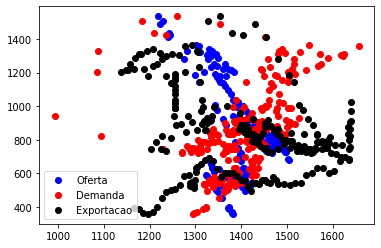

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# plt.style.use('_mpl-gallery')

# make data
x = df_temp['D_exports']
y = df_temp['D_price']

# plot
fig, ax = plt.subplots()

ax.scatter(d.predict(), df_temp['D_price'], label='Oferta', color='b')
ax.scatter(o.predict(), df_temp['D_price'], label='Demanda', color='r')

ax.scatter(df_temp['D_exports'], df_temp['D_price'], label='Exportacao', color='k')

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.legend()
plt.show()

C:\Users\fkfouri\AppData\Local\Temp\ipykernel_24020\1296184498.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


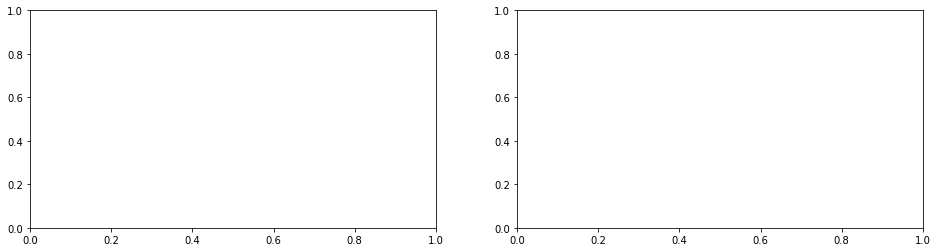

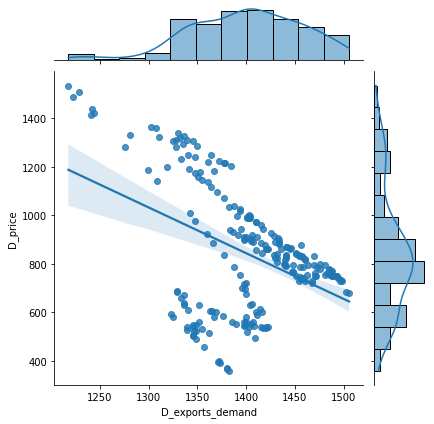

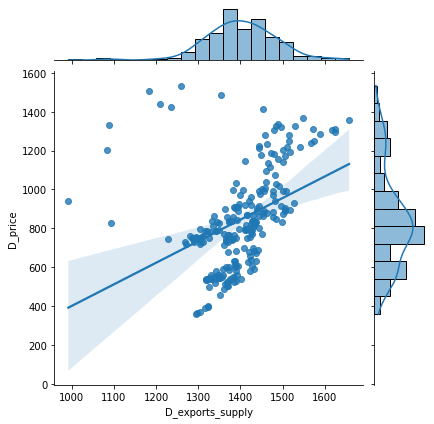

In [60]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
ax1 = sns.jointplot(x=df_temp['D_exports_demand'], y=df_temp['D_price'], kind='reg', ax=ax1)

ax2 = sns.jointplot(x=df_temp['D_exports_supply'], y=df_temp['D_price'], kind='reg', ax=ax2)
fig.show()

In [100]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
import scipy
x = ax1.x
y = ax1.y
res =  scipy.stats.linregress(x=x, y=y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=ax1.x, y=ax1.y)
res 

LinregressResult(slope=-1.887165217103115, intercept=3485.485435279978, rvalue=-0.4273228216921261, pvalue=1.3983681606721455e-11, stderr=0.2650067587980169, intercept_stderr=371.1870517057596)

In [83]:
print(f"R-squared: {res.rvalue**2:.6f}")

R-squared: 0.182605


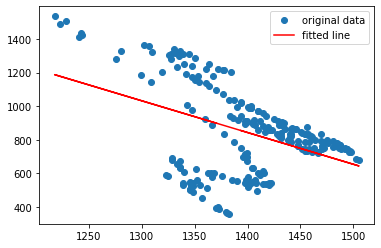

In [84]:
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [61]:
df_temp

,D_exports,D_price,input_mundi_dap,world_income,D_exports_demand,D_exports_supply
date,,,,,,
2020-12-31,1640.17,1026.196,388.50,730.62,1393.647006,1483.192528
2020-11-30,1639.60,973.880,359.63,733.87,1410.152854,1477.001856
2020-10-31,1639.03,914.770,357.10,737.12,1428.561902,1444.513460
2020-09-30,1638.46,905.860,358.38,740.37,1432.908450,1438.208664
2020-08-31,1637.89,866.940,341.88,743.62,1445.661684,1429.385811
...,...,...,...,...,...,...
2002-04-30,1206.11,370.860,147.80,384.42,1380.094951,1303.175995
2002-03-31,1196.17,359.210,149.75,383.43,1382.794740,1294.698186
2002-02-28,1186.22,364.920,150.25,382.43,1380.625787,1297.619985


## Terceira Regressao

In [67]:
# SOJA

EXP = 'D_exports_demand'
PRIC = 'D_price'
df = df_temp.copy()
df['const'] = 1


y1 = df[PRIC]
# X1 nao tem a variavel endogena exp_total, porem considera a variavel instrumental input_mundi_dap
X1 = df[['const', EXP]]
ols_model = sm.OLS(y1,X1)
ols_results = ols_model.fit()
print(ols_results.summary())

lr_modelo = LinearRegression()
lr_modelo.fit(X=X1, y=y1)


                            OLS Regression Results                            
Dep. Variable:                D_price   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     50.71
Date:                Sun, 29 May 2022   Prob (F-statistic):           1.40e-11
Time:                        21:54:54   Log-Likelihood:                -1569.8
No. Observations:                 229   AIC:                             3144.
Df Residuals:                     227   BIC:                             3150.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3485.4854    371.187  

LinearRegression()

In [63]:
lr_modelo.predict(np.array([[1, 900]]))

E:\Projetos\vegetable_oil_mkt\.env-win-tese\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1787.03673989])

In [64]:
lr_modelo.predict(np.array([1, 747]) )

E:\Projetos\vegetable_oil_mkt\.env-win-tese\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[  1 747].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [65]:
lr_modelo = LinearRegression()
lr_modelo.fit(X=X1, y=y1)
p_hat = lr_modelo.predict(X1)

In [66]:
EXP = 'D_exports_supply'
PRIC = 'D_price'
df = df_temp.copy()
df['const'] = 1


y1 = df[PRIC]
# X1 nao tem a variavel endogena exp_total, porem considera a variavel instrumental input_mundi_dap
X1 = df[['const', EXP]]
ols_model = sm.OLS(y1,X1)
ols_results = ols_model.fit()
print(ols_results.summary())

                            OLS Regression Results                            
Dep. Variable:                D_price   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     40.48
Date:                Sun, 29 May 2022   Prob (F-statistic):           1.08e-09
Time:                        21:50:16   Log-Likelihood:                -1574.1
No. Observations:                 229   AIC:                             3152.
Df Residuals:                     227   BIC:                             3159.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -711.1681    244.991  

# KFAS
E agora???

## Soja

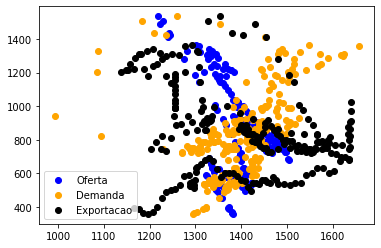

LinregressResult(slope=-1.887165217103115, intercept=3485.485435279978, rvalue=-0.4273228216921261, pvalue=1.3983681606721455e-11, stderr=0.2650067587980169, intercept_stderr=371.1870517057596)
R-squared: 0.182605


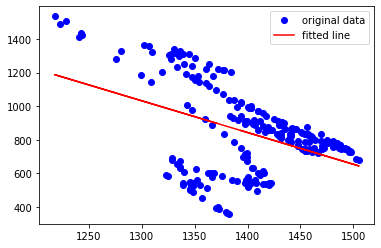

LinregressResult(slope=1.111536162847366, intercept=-711.1680755804771, rvalue=0.38902016778763265, pvalue=1.0836555459785767e-09, stderr=0.17470537406873726, intercept_stderr=244.99060194550754)
R-squared: 0.151337


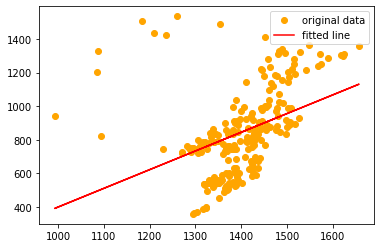

In [96]:
EXP = 'D_exports'
PRIC = 'D_price'

df_temp = df_main[[EXP, PRIC, 'input_mundi_dap', 'world_income']]
df_temp, d, o, P, Q = reducted(df_temp, explicada= EXP, endogena= PRIC, explicativas= ['world_income'], VI=['input_mundi_dap'] )

# plot
fig, ax = plt.subplots()

ax.scatter(d.predict(), df_temp[PRIC], label='Oferta', color='b')
ax.scatter(o.predict(), df_temp[PRIC], label='Demanda', color='orange')

ax.scatter(df_temp[EXP], df_temp[PRIC], label='Exportacao', color='k')

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.legend()
plt.show()

x = df_temp[f'{EXP}_demand']
y = df_temp[PRIC]
res =  scipy.stats.linregress(x=x, y=y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=ax1.x, y=ax1.y)
print(res )

print(f"R-squared: {res.rvalue**2:.6f}")

plt.plot(x, y, 'o', label='original data', color='b')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

x = df_temp[f'{EXP}_supply']
y = df_temp[PRIC]
res =  scipy.stats.linregress(x=x, y=y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=ax1.x, y=ax1.y)
print(res )

print(f"R-squared: {res.rvalue**2:.6f}")

plt.plot(x, y, 'o', label='original data', color='orange')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

## PALMA

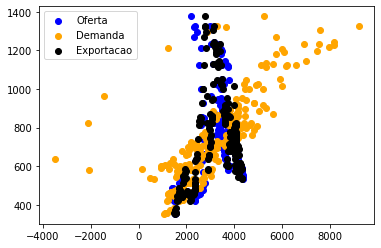

LinregressResult(slope=0.09832053511345812, intercept=425.41124791798, rvalue=0.3364045221336057, pvalue=1.8315018684615096e-07, stderr=0.018267964414575833, intercept_stderr=59.10715475635952)
R-squared: 0.113168


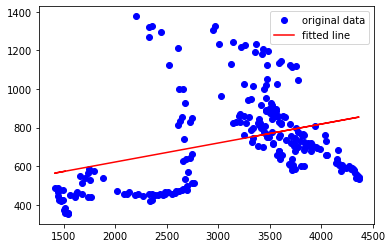

LinregressResult(slope=0.1029285497313482, intercept=410.9756209189649, rvalue=0.7762363951359367, pvalue=2.2472531138446406e-47, stderr=0.005548480074279324, intercept_stderr=20.002053798476265)
R-squared: 0.602543


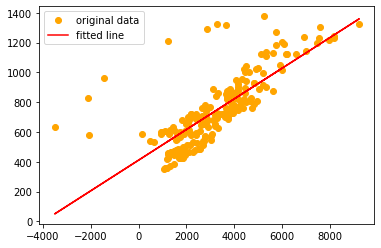

In [97]:
EXP = 'B_exports'
PRIC = 'B_price'

df_temp = df_main[[EXP, PRIC, 'input_mundi_dap', 'world_income']]
df_temp, d, o, P, Q = reducted(df_temp, explicada= EXP, endogena= PRIC, explicativas= ['world_income'], VI=['input_mundi_dap'] )

# plot
fig, ax = plt.subplots()

ax.scatter(d.predict(), df_temp[PRIC], label='Oferta', color='b')
ax.scatter(o.predict(), df_temp[PRIC], label='Demanda', color='orange')

ax.scatter(df_temp[EXP], df_temp[PRIC], label='Exportacao', color='k')

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.legend()
plt.show()

x = df_temp[f'{EXP}_demand']
y = df_temp[PRIC]
res =  scipy.stats.linregress(x=x, y=y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=ax1.x, y=ax1.y)
print(res )

print(f"R-squared: {res.rvalue**2:.6f}")

plt.plot(x, y, 'o', label='original data', color='b')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

x = df_temp[f'{EXP}_supply']
y = df_temp[PRIC]
res =  scipy.stats.linregress(x=x, y=y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=ax1.x, y=ax1.y)
print(res )

print(f"R-squared: {res.rvalue**2:.6f}")

plt.plot(x, y, 'o', label='original data', color='orange')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

## Canola

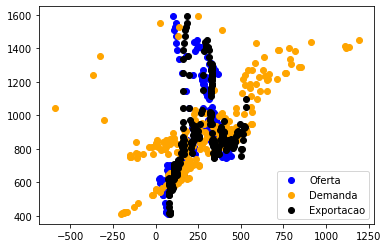

LinregressResult(slope=0.5036661741058277, intercept=759.7097905222017, rvalue=0.25255256820494953, pvalue=0.0001116734128225857, stderr=0.128075592885945, intercept_stderr=38.25526273419193)
R-squared: 0.063783


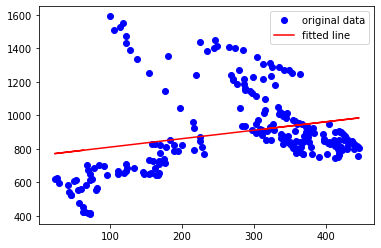

LinregressResult(slope=0.6012203033337677, intercept=733.1471430352196, rvalue=0.6732175044216523, pvalue=1.36333940941677e-31, stderr=0.04382994264821439, intercept_stderr=16.93727952081521)
R-squared: 0.453222


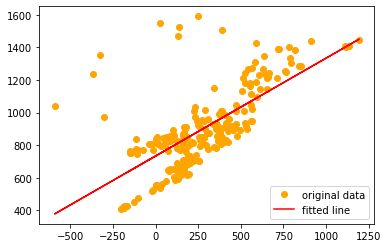

In [98]:
EXP = 'C_exports'
PRIC = 'C_price'

df_temp = df_main[[EXP, PRIC, 'input_mundi_dap', 'world_income']]
df_temp, d, o, P, Q = reducted(df_temp, explicada= EXP, endogena= PRIC, explicativas= ['world_income'], VI=['input_mundi_dap'] )

# plot
fig, ax = plt.subplots()

ax.scatter(d.predict(), df_temp[PRIC], label='Oferta', color='b')
ax.scatter(o.predict(), df_temp[PRIC], label='Demanda', color='orange')

ax.scatter(df_temp[EXP], df_temp[PRIC], label='Exportacao', color='k')

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.legend()
plt.show()

x = df_temp[f'{EXP}_demand']
y = df_temp[PRIC]
res =  scipy.stats.linregress(x=x, y=y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=ax1.x, y=ax1.y)
print(res )

print(f"R-squared: {res.rvalue**2:.6f}")

plt.plot(x, y, 'o', label='original data', color='b')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

x = df_temp[f'{EXP}_supply']
y = df_temp[PRIC]
res =  scipy.stats.linregress(x=x, y=y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=ax1.x, y=ax1.y)
print(res )

print(f"R-squared: {res.rvalue**2:.6f}")

plt.plot(x, y, 'o', label='original data', color='orange')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

## Girassol

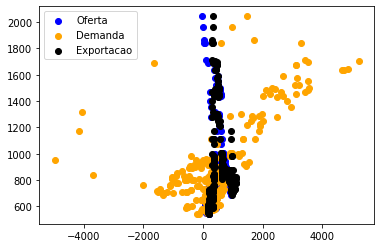

LinregressResult(slope=-0.12565627581783984, intercept=998.4999789976182, rvalue=-0.09751745124952876, pvalue=0.1412532924807015, stderr=0.08511655489389333, intercept_stderr=49.95275342673989)
R-squared: 0.009510


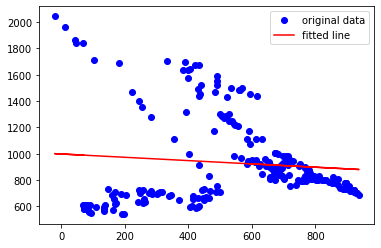

LinregressResult(slope=0.15043734380612825, intercept=852.298509028484, rvalue=0.6385337217059774, pvalue=1.250063336390087e-27, stderr=0.012034290087362145, intercept_stderr=17.830459031733366)
R-squared: 0.407725


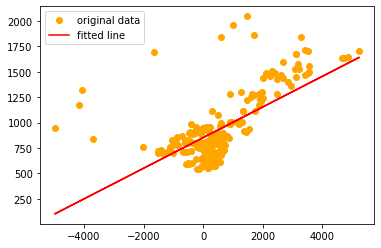

In [99]:
EXP = 'E_exports'
PRIC = 'E_price'

df_temp = df_main[[EXP, PRIC, 'input_mundi_dap', 'world_income']]
df_temp, d, o, P, Q = reducted(df_temp, explicada= EXP, endogena= PRIC, explicativas= ['world_income'], VI=['input_mundi_dap'] )

# plot
fig, ax = plt.subplots()

ax.scatter(d.predict(), df_temp[PRIC], label='Oferta', color='b')
ax.scatter(o.predict(), df_temp[PRIC], label='Demanda', color='orange')

ax.scatter(df_temp[EXP], df_temp[PRIC], label='Exportacao', color='k')

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.legend()
plt.show()

x = df_temp[f'{EXP}_demand']
y = df_temp[PRIC]
res =  scipy.stats.linregress(x=x, y=y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=ax1.x, y=ax1.y)
print(res )

print(f"R-squared: {res.rvalue**2:.6f}")

plt.plot(x, y, 'o', label='original data', color='b')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

x = df_temp[f'{EXP}_supply']
y = df_temp[PRIC]
res =  scipy.stats.linregress(x=x, y=y)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=ax1.x, y=ax1.y)
print(res )

print(f"R-squared: {res.rvalue**2:.6f}")

plt.plot(x, y, 'o', label='original data', color='orange')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [ ]:
y1 = df['price_total_exp']
# X1 nao tem a variavel endogena exp_total, porem considera a variavel instrumental input_mundi_dap
X1 = df[['const', 'world_income', 'input_mundi_dap']]
lr_modelo = LinearRegression()
lr_modelo.fit(X=X1, y=y1)
p_hat = lr_modelo.predict(X1)

In [ ]:
lr_modelo.coef_